## Evaluación de modelos
Un paso importante en la construcción de algoritmos de Machine learning, ML, o Deep Learning, DL, es la correcta evaluación de estos. Típicamente la evaluación de las técnicas de ML y DL pasa por dado un conjunto de datos partirlo en dos bloques: training y test, y probar lo bien o mal que funciona la técnica en base a los resultados obtenidos en test. Sin embargo, esto no es del todo adecuado dado que en muchas ocasiones un solo conjunto de entrenamiento puede producir sesgos o dar predicciones poco robustas (el azar es importante tenerlo en cuenta a la hora de ajustar modelos). Además, interesa también ser capaz de comparar distintos modelos, así como ajustar hiperparámetros en un modelo de ML. ¿Como comparamos hiperparámetros? ¿Usamos un solo split de datos y posteriormente evaluamos contra test? Por lo general, este no suele ser el pathway que se sigue sino que el número de divisiones del conjunto de datos suele ser 3:
* Training - autoexplicativo, se trata de un subconjunto del conjunto de datos original que se usa para el entramiento del modelo. Es el subconjunto empleado para ajustar los modelos y todos sus parámetros (dados unos hiperparámetros fijados por el usuario).
* Validación - este es un poco más controvertido porque existen científicos de datos que no los usan y otros que si. Sin embargo, el sentido común dice que han de ser usados. Su finalidad radica fundamentalmente en dos puntos:
    * Ajuste de hiperparámetros a través de la construcción de modelos con sus respectivos tests y por tanto comparables (siempre los mismos conjuntos de training y test).
    * Construcción de modelos no sesgados por la muestra de datos empleados. Una simple división Training y Test nos puede llevar a construir modelos que en ese conjunto de Test performen particularmente bien, pero que en otros no valgan para nada. La construcción de conjuntos de validación con aproximaciones como el k-folding o leave one out nos evitan tener estas situaciones. Básicamente, este tipo de aproximaciones nos dan un visión más realista de como funciona nuestro modelo realmente.
    
<p align="center">
  <img width="460" height="300" src=figures/training_val_test.PNG>
</p>

* Test - conjunto de pruebas final donde probaremos nuestro algoritmo de ML o DL. Las estadísticas o métricas de performance finales se suelen asociar a estos conjuntos.

### Validación cruzada (CV)

Validación cruzada o cross validation, CV, es una técnica usada para la evaluación de los resultados de un análisis estadístico y garantizar que son independientes de la partición de los datos realizada. La idea básica de estos métodos es muestrear los datos "K" veces y promediar los resultados de performance que se obtienen, junto con otras estadísticas de interés como la desviación estándar. Esto nos permite obtener una idea de como de buenos son estos ajustes y como de fiables son, es decir, nos permite hacernos una idea de que esperar cuando hagamos el test del modelo.

Podemos diferenciar dos aproximaciones diferentes:
* Non-exhaustive cross validation o validación cruzada no exhaustiva:
    * Random sampling CV o Validación aleatoria - en esta no entraremos dado que se trata de una aproximación similar al típico Montecarlo usado en simulación, estimación de parámetros o integración ($E[X] = \int_{-\infty}^{\infty}xf(x)dx$). Consiste fundamentalmente en partir el dataset de entrenamiento k veces en 100 - p% training y p% validación. El muestreo es con reemplazamiento y lo que se busca es conseguir "k" sets de validación que nos permitan determinar estimar adecuadamente el error del modelo (valido para K-folding también $$E = \frac{1}{N}\sum_{i = 1}^N E_i$$
    * k-folding 
* Exhaustive cross validation 
    * Leave-one-out (LOO)
    * Leave-p-out - nuevamente no entraremos en mucho detalle, pero el objetivo y como se realiza es similar al LOO general pero en lugar de dejar 1 solo caso fuera se dejarían "p" casos.
#### k-Folding CV:
Como ya se ha explicado k-Fold CV es una modo de remuestreo utilizado para validar modelos de ML o DL. La idea o el propósito de estas técnicas es:
* Construir estimaciones más fiables del comportamiento del modelo ante datos no vistos hasta el momento.
* Obtener modos realistas de comparar distintos:
    * Modelos - entendiendo estos como diferentes algoritmos.
    * Hiperparámetros - dentro de cada uno de los modelos. Selección óptima de hiperparámetros.
Esta imagen resume funcionamiento que es muy elemental y fácil de entender.

<p align="center">
  <img width="460" height="300" src=figures/kfold.PNG>
</p>

Básicamente, todo el conjunto de training, de longitud digamos $N$, se divide "K" veces en 2 particiones de Training y Validación de tal manera que los k conjuntos de validación construidos tienen tamaño $\frac{N}{K}$ y son disjuntos, es decir $i,j/i\neq j \rightarrow V_i \cap V_j = \emptyset,\  \forall i,j \in [1,\dots,K]$. De este modo nos aseguramos que todo dato del conjunto de entrenamiento es usado en algún momento para test y que todos los datos de entrenamiento son usados el mismo número de veces para entrenar. Este tipo de aproximaciones se caracterizan por producir modelos con menor sesgo. ¿Que tamaño de K seleccionar?:
* El valor de "K" ha de ser tal que la muestra de test resultante sea de suficientemente grande para poder ajustar el modelo. Cuando más pequeño sea "N" más tamaño podemos hacer que tenga "K".
* En líneas generales un valor de 10 suele ser aceptable.
* En casos donde el tamaño de la muestra es reducido podemos optar por una metodología LOO (dejar solo uno fuera).

##### Leave one out Cross Validation (LOO-CV):
Se trata de un caso extremo de k-Folding con valor de "K" igual al tamaño de la muestra, es decir $K = N$. Esta metodología suele ser recomendable cuando el tamaño de la muestra es reducido. Sin embargo, es el método que produce mejores estimaciones del error esperado en el conjunto de test.

#### Aplicación de CV:

* Mezclamos los datos (shuffle) - eliminamos sesgos de ordenación.
* Dividimos los datos en training-test - reservamos la muestra de test para la evaluación final del modelo.
* Dividimos la muestra de training en $k$ bloques - cada bloque va a ser un conjunto de validación.
* Para cada bloque en bloques:
    * training_set = training - bloque.
    * Ajustamos con training_set
    * evaluamos con bloque
    * guardamos las métricas de evaluación que nos interesen y descartamos el modelo
* Promediamos las métricas obtenidas y sus desviaciones.

### Nested cross validation:
Se trata de aproximaciones genéricas donde se busca realizar el ajuste de los hiperparámetros mientras que se realiza una estimación del error de los modelos. La técnica más general es la que se conoce como *k-fold cross validation con validación y conjunto de test*. Se trata de una metodología autoexplicativa donde un conjunto de datos T es dividido en (k+1) bloques, 1 de estos bloques se reserva para testing y se aplica la metodología k-fold en los (k) bloques restantes. Finalmente, se evalúa el modelo sobre el conjunto de test existiendo dos opciones: construir un nuevo modelo o usar el modelo previamente ajustado.

##### Train test split

(150, 4) (150,)


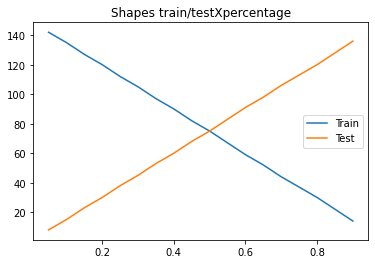

In [1]:
## Ejemplo de codigo de la web de sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
## Example with SVM
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
print(X.shape,y.shape)
shapes_train, shapes_test = [], []
x = list(np.arange(0.05,0.95,0.05))
for i in np.arange(0.05,0.95,0.05):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=i, random_state=654321)
    shapes_train.append(X_train.shape[0])
    shapes_test.append(X_test.shape[0])
plt.figure()
plt.plot(x, shapes_train, label = 'Train')
plt.plot(x, shapes_test, label = 'Test')
plt.title('Shapes train/testXpercentage')
plt.legend()

##### k-Fold

* n_splits = k.
* random_state - para obtener reproducilidad tenemos que fijar la semilla.
* shuffle - mezcla de los datos antes de samplear para evitar sesgos de posición.

Num splits:  5
Validation mean acc:  95.83333333333334  Std acc:  2.6352313834736525
Test acc:  100.0
Num splits:  6
Validation mean acc:  95.83333333333333  Std acc:  4.487637339278753
Test acc:  100.0
Num splits:  7
Validation mean acc:  94.95798319327731  Std acc:  3.758097441176118
Test acc:  100.0
Num splits:  8
Validation mean acc:  95.83333333333334  Std acc:  5.713045500334202
Test acc:  100.0
Num splits:  9
Validation mean acc:  94.87179487179486  Std acc:  6.280742930213279
Test acc:  100.0


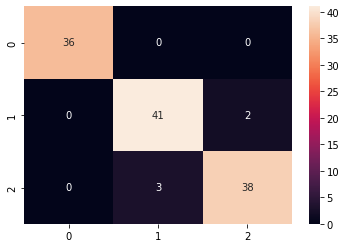

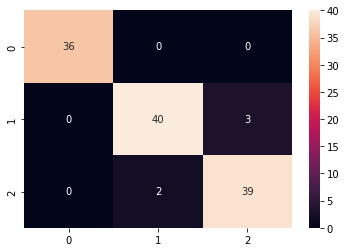

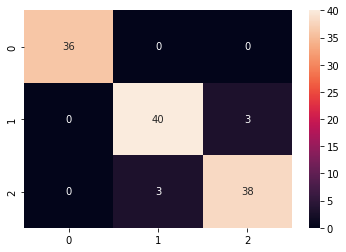

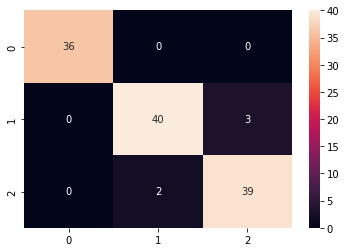

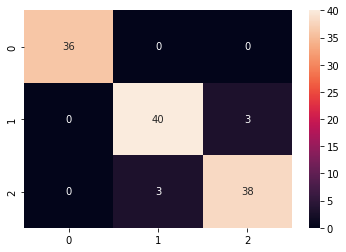

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns

X, y = datasets.load_iris(return_X_y=True)
# Dividimos el data set en train-test
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=654321)
def _acc(y_obs, y_pred):
    hits = 0
    for i in range(len(y_obs)):
        hits += (y_obs[i] == y_pred[i])
    return (hits/len(y_obs)*100)
# Empezamos la validación cruzada
for k in range(5,10):
    cv = KFold(n_splits = k, random_state = 654321, shuffle = True)
    print('Num splits: ', cv.get_n_splits())
    fig, axs = plt.subplots(ncols=1)
    y_pred, y_real = [], []
    # Just one performance metric
    acc = []
    for i,(train_idx, test_idx) in enumerate(cv.split(X_train)):
        train_X, train_Y = X_train[train_idx], y_train[train_idx]
        test_X, test_Y = X_train[test_idx], y_train[test_idx]
        # Adjust for fun and assay
        model = SVC()
        model.fit(train_X,train_Y)        
        # Make predictions
        preds = list(model.predict(test_X))
        y_pred += preds
        y_real += list(test_Y)
        # Acc:
        acc.append(_acc(test_Y, preds))
    acc = np.array(acc)
    print('Validation mean acc: ', np.mean(acc),' Std acc: ',np.std(acc))
    cm = confusion_matrix(y_real, y_pred)    
    sns.heatmap(cm, annot=True)
    # Adjust and test the model 
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Test acc: ', _acc(y_test,y_pred))

## Ajuste de hiperparámetros:
En ocasiones, de hecho en la mayoría de situaciones, es desconocida la configuración óptima de la estructura de ML/DL. Esta configuración generalmente es conocida como la arquitectura del modelo. Sin embargo, lo ideal es ser capaz de realizar una selección automática de esta arquitectura. Para ello lo ideal es ser capaz de explorar una serie de posibilidades lo más amplia o precisa posible. Estos parámetros que regulan o gestionan la arquitectura del modelo son los famosos *hiperparámetros".

¡OJO! Hay que diferenciar entre parámetros que son ajustados durante el entrenamiento a través de las funciones de pérdida (*Loss function*) y estos se centran en definir como nuestro modelo transforma los datos. Por otro lado, los hiperparámetros no pueden ser análitica o iterativamente ajustables y definen como nuestro modelo se estructura.

Generalmente el modo de operar es:
* Determinar que modelo/modelos a ajustar
* Definir el rango de hiperparámetros
* Definir un método para samplear los hiperparámetros
* Definir como evaluar el modelo
* Implementar un método de CV adecuado

***¿Como debemos evaluar el modelo?*** dos opciones:
* Usar el dataser de entrenamiento para entrenar el modelo y posteriormente evaluar contra test y decidir que hiperparámetros son los que mejores resultados de test se obtienen. Problema:
    * Data leakage - estaríamos artificialmente escogiendo hiperparámetros que van a ajustar óptimamente nuestro data set de test pero no necesariamente con capacidad de generalización.
* Usar un mecanismos de k-folding como los que previamente vimos. (mucho más adecuado y es el que vamos a seguir).

<p align="center">
  <img width="460" height="300" src=figures/training_val_test_2.PNG>
</p>

https://www.jeremyjordan.me/hyperparameter-tuning/

Veamos un ejemplo: 

C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


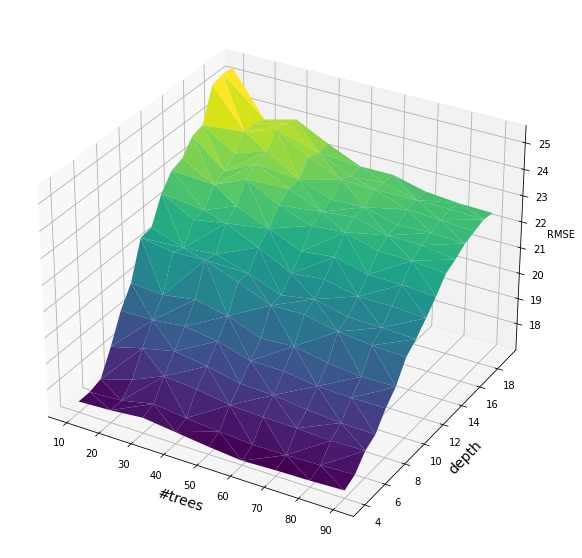

In [97]:
import pandas as pd
from datetime import date, datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import itertools
# Split the data into training and testing sets
df_sales = pd.read_csv('data/sales.csv')
# Reduce the entry
df_sales = df_sales[1:1000]
df_sales['order_placed_at'] = pd.to_datetime(df_sales.order_placed_at, format='%Y-%m-%d %H:%M:%S')
df_sales['month'] = df_sales['order_placed_at'].dt.month
# Just splitting the data
y = np.array(df_sales.realized_prep_time)
# Droping useless features
df_sales.drop(['Unnamed: 0','vertical_type','city_id','realized_prep_time','order_placed_at','vendor_code'], axis = 1, inplace = True)
X = np.array(df_sales[df_sales.columns.values])
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 654321)
# Random forest - grid search
grid = {'n_estimators':list(range(10,100,10)), 'max_depth':list(range(4,20,1))}
print
list_grid = [item for item in itertools.product(grid['n_estimators'], grid['max_depth'])]
trees = [t[0] for t in list_grid]
depths = [t[1] for t in list_grid]
rmse = []
for pair in list_grid:
    rf = RandomForestRegressor(n_estimators = pair[0],max_depth = pair[1], random_state = 6543210)
    # Train the model on training data
    rf_model = rf.fit(train_features, train_labels)
    y_pred = rf_model.predict(test_features)
    rmse.append(float(mean_squared_error(test_labels, y_pred)))

fig = plt.figure(1, figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(trees, depths,rmse, cmap=plt.cm.viridis, linewidth=0.2)
plt.xlabel('#trees', fontsize = 14)
plt.ylabel('depth', fontsize = 14)
ax.set_zlabel('RMSE')
plt.show()


Los resultados previos aunque erróneos son muy interesantes. Muestran que el RMSE, $\sqrt{\frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{n}}$ es mínimo cuando la profundidad es más baja y a medida que la incrementamos parece que empeoramos. Es decir cuando damos más holgura al árbol para ajustarse a los datos de entrenamiento mayor de test cometemos. *¿Porque erróneos?* Simplemente no son robustos puesto que para cada par *número de árboles* *profundidad* estamos obteniendo una sola muestra y por tanto puede existir sesgo en el conjunto de datos. Adicionalmente, la validez de los hiperparámetros se ha de realizar a través de técnicas de validación cruzada (simplemente para poder fiarnos de estos resultados).

### Grid Search:

El grid search se basa en definir una malla de hiperparámetros, que representa lo que tradicionalmente se conoce como espacio de búsqueda. Posteriormente, el algoritmo es entrenado con cada combinación dentro de esta malla. Obviamente, esta técnica es exhaustiva por lo que cuando el conjunto de estados es finito todas las combinaciones son eventualmente validadas y por tanto la solución encontrada siempre ideal. Sin embargo, en escenarios donde el espacio es muy grande esto no tiene sentido pues la cantidad de recursos computacionales necesarios es demasiado alta.

### Random Search:

Random search es diferente puesto que no  explora todo el conjunto posible de hiperparámetros. Este selecciona de manera aleatoria un número de combinaciones especificadas por el usuario y por tanto no chequea todas las posibles combinaciones de hiperparámetros. Sin embargo, se puede probar estadísticamente que eventualmente alcanza un mínimo y este suele ser el óptimo o estar próximo de este. Random search es el método más adecuado en casos donde el espacio de búsqueda es muy amplio.

### Bayesian optimization: 
(Leer con calma: https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f)

### Parameters adjustment examples:

#### ***Baseline***

Train accuracy: 1.0
Test accuracy: 0.77

Test confusion_matrix


Text(13.060000000000002, 0.5, 'True')

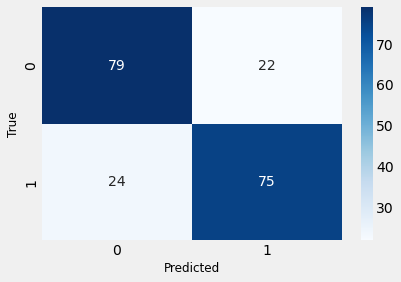

In [80]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Make classification
n_features = 30
n_informative = 5
sample_size = 1000
# create dataset
X, y = make_classification(n_samples=sample_size, n_features=n_features, n_informative=n_informative, n_redundant=n_features - n_informative, random_state=6543210)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dtclf = DecisionTreeClassifier(random_state=6543210)
dtclf.fit(X_train, y_train)
y_pred = dtclf.predict(X_test) # Predictions
y_true = y_test # True values

from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

#### ***Grid Search***

Optimal hyperparameter combination: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.8125
Test accuracy: 0.78
Execution time of Grid Search (in Seconds): 16.61903190612793


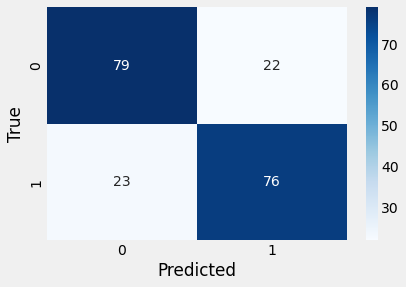

In [81]:
from sklearn.model_selection import GridSearchCV
import time
start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

gs = GridSearchCV(dtclf, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)

#### ***Random Search***

Optimal hyperparameter combination: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8}

Mean cross-validated training accuracy score: 0.805
Test accuracy: 0.8
Execution time of Random Search (in Seconds): 0.5159721374511719


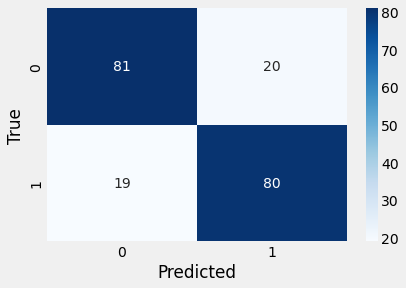

In [82]:
from sklearn.model_selection import RandomizedSearchCV
import time
start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=6543210,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)

## Evaluación modelos

#### Evaluación de modelos de clasificación

Existen muchas métricas distintas utilizadas para problemas de clasificación como son la precisión, la sensibilidad, el accuracy, la especificidad, el f-score, etc. Sin embargo, el usar una u otra no es indiferente puesto que en ciertas ocasiones estas métricas presentan sesgos y es necesaro evitarlas. El caso más claro es el accuracy entendido como $\frac{TP + TN}{TP+TN+FP+FN}$ que claramente esta sesgado cuando la muestra está muy desbalanceada. Por ejemplo, si tenemos $90\%$ del la clase A y $10\%$ de la clase B, el accuracy del clasificador naïve que asocia todo a la misma clase sería del $90\%$ pero claramente sería un clasificador pésimo.

***Métricas de interes***

* Accuracy: $$\frac{TP + TN}{TP+TN+FP+FN}$$ La $acc$ pese a ser sumamente empleada peca de problemas ante un imbalanceo de las clases, si una copa en gran medida la muestra automáticamente un clasificador naive va a presentar niveles de $acc$ altísimos.
* Matriz de confusión - estructura clásica donde se presentan los aciertos y errores de un modelo. A la hora de explicarse suelen usarse simplemente dos clases y se determina el número de casos que cae en cada celda. Tenems cuatro valores distintos:
    * True Positives (TP) - número de positivos correctamente clasificados (criminales correctamente encerrados)
    * False Positives (FP) - número de negativos correctamente clasificados (inocentes erróneamente encerrados)
    * True negatives (TN) - número de negativos correctamente clasificados (inocente correctamente puestos en libertad)
    * False negatives (FN) - número de positivos erróneamente clasificados (criminales dejados en libertad)
    
Obviamente, todas estás métricas son generalizables a $3\dots C$ clases.

<p align="center">
  <img width="460" height="300" src=figures/confusion_matrix.PNG>
</p>

* AUC/ROC - la curva ROC y por transición el AUC (Area Under the Curve) son técnicas de medición del performance que nos permiten observar la bondad de una clasificación binario usando diferentes niveles de umbralización. De manera sencilla la curva ROC surge de la relación de $Precision, 1-especificidad$ a distintos niveles de corte para la clasificación (desde $[0.0,\dots, 1.0]$). Finalmente el AUC no es más que $\int_{0}^1ROC(x)dx$
* Precision + Recall - métricas clásicas de performance: $$P=\frac{TP}{TP + FP}$$ $$R =\frac{TP}{TP + FN}$$ Es claro que las medidas de precisión determinar la calidad de nuestras deciciones mientras que las medidas de recall determinan la sensibilidad de estas. Es evidente como pasará con el $F1$ que estas métricas son asimétricas, es decir, dependiendo de que categoría observemos podems tener unos resultados u otros y esto no es adecuado en muchas ocasiones.
* F1-score - es una medida combinada de la precisión y recall que permite tratar ambas de manera simultánea, es decir nos ofrece una métrica que combina los resultados de ambas: $$ F1 = 2 \cdot \frac{P \cdot R}{P + R}$$
* Kappa index (de Cohen) - es una métrica que permite comparar como de atinada es la clasificación frente al clasificador por puro azar. Permite determinar como de distante está nuestra clasificación de un clasificador aleatorio (uno que clasifique siguiendo funciones de masa de probabilidad en la muestra):$$\kappa = \frac{acc - acc_{random}}{1 - acc_{random}}$$
* Matthews Correlation Coefficient o MCC - esta métrica se plantea como la solución a los problemas de desbalanceo y de asimetría de métricas como el recall/precisión/F1. Para ello en el caso de clasificaciones binarias (**ojo solo en clasificaciones binarias**) se puede emplear esta métrica que calcula el *coeficiente de correlación* ($\frac{\sigma_{xy}}{\sigma_x\sigma_y}$) entre las clasificaciones realizadas. $$MCC = \frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP + FP)(TP + FN)(TN + FN)(TN + FP)}}$$

***Métricas útiles frente a datos***
Una de las situaciones más frecuentes en los conjuntos de datos suele ser la presencia de desbalanceo en las clases o categorías. Por ejemplo, en estudios de diagnóstico es muy frecuente tener muchos casos negativos, gente sin la enfermedad, y no muchos casos positivos, gente con enfermedad. Si bien esto es un problema en si puesto que en muchas ocasiones la cantidad de muestra de unas de las categorías no es suficiente para permitir capturar la variabilidad de esta, también surgen problemas derivadas de un incorrecto uso de métricas de clasificación.

* AUC/ROC - útil.
* Matthews Correlation - útil.
* Precision/Recall/F1 - útil, **SI** miramos para todas las clases.


Text(0.5, 1.0, 'Recall')

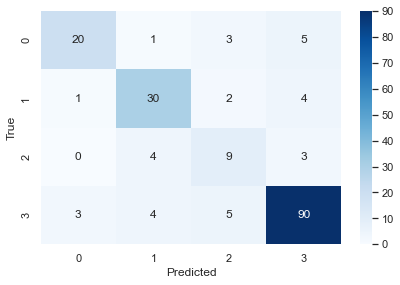

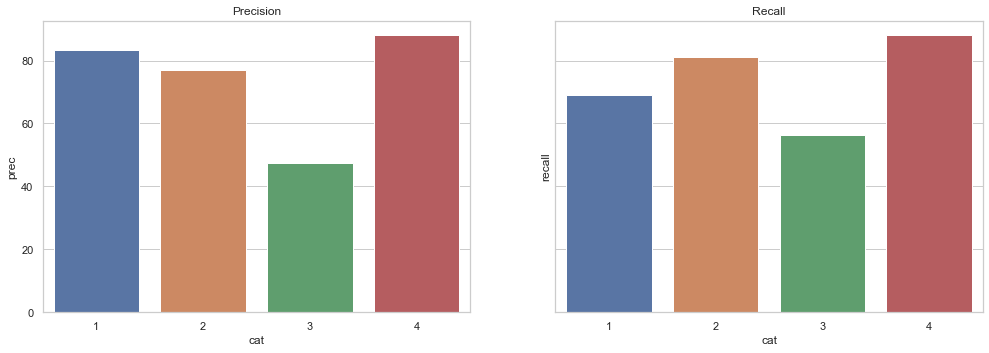

In [172]:
import numpy as np
import seaborn as sns
import pandas as pd
# cf shape rows - true, columns - predicted
def produce_metrics(cf_matrix_synthetic):
    metrics = {'acc':0.,'prec':[],'recall':[],'f1':[],'kappa':0.}
    if cf_matrix_synthetic.shape[0] == 2:
        metrics['mcc':0.]
        binary = True
    results = [{'TP':0,'FP':0,'FN':0} for t in range(cf_matrix_synthetic.shape[0])]
    perc_class = np.array([0. for t in range(cf_matrix_synthetic.shape[0])])
    tot_elements = np.sum(cf_matrix_synthetic)
    for i, row in enumerate(cf_matrix_synthetic):
        results[i]['TP'] = row[i]
        results[i]['FN'] = np.sum(np.append(row[0:i],row[(i+1):]))
        results[i]['FP'] = np.sum(cf_matrix_synthetic[0:i,i]) + np.sum(cf_matrix_synthetic[(i+1):,i])
        perc_class[i] = (np.sum(row)) / (tot_elements)
    random_class = np.mean(perc_class)
    tot_tp = 0.
    for result in enumerate(results):
        i,r = result[0], result[1]
        metrics['prec'].append(r['TP'] / (r['TP'] + r['FP'])*100.)
        metrics['recall'].append(r['TP']/(r['TP'] + r['FN'])*100.)
        metrics['f1'].append(2*(metrics['prec'][i]*metrics['recall'][i])/(metrics['prec'][i]+metrics['recall'][i]))   
        tot_tp += r['TP']
    metrics['acc'] = tot_tp/tot_elements
    metrics['kappa'] = (metrics['acc'] - random_class) / (1 - random_class)
    return metrics
cf_matrix_synthetic = np.array([[20, 1,3,5], [1,30,2,4], [0,4,9,3],[3,4,5,90]])
sns.heatmap(cf_matrix_synthetic, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

metrics = produce_metrics(cf_matrix_synthetic)

df = pd.DataFrame(metrics)
df['cat'] = [1,2,3,4]
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(ax=axes[0], x=df.cat, y=df.prec)
axes[0].set_title('Precision')

sns.barplot(ax=axes[1], x=df.cat, y=df.recall)
axes[1].set_title('Recall')

#### Evaluación modelos de regresión

Para la evaluación de modelos de regresión tenemos diversas técnicas:
* Coeficiente de determinación o $R^2$: $$R^2 = 1- \frac{SS_{res}}{SS_{tot}}$$, siendo:
    * $SS_{res} = \sum_i (y_i - \hat{y_i})^2$ la suma de los residuos al cuadrado.
    * $SS_{tot} = \sum_i (y_i - \overline{y})^2$ la variabilidad total del modelo.
En este caso buscaríamos maximizar este valor. Este se movería entorno al [0..1.0] siendo el $0$ la falta total de explicación y el $1.0$ una explicación total.
* Root mean squared error, o RMSE - $$\sqrt{\frac{\sum_i^N (y_i - \hat{y_i})^2}{N}}$$
* Absolute mean error, AME - $$\frac{1}{N}|\sum_i^N (y_i - \hat{y_i})|$$

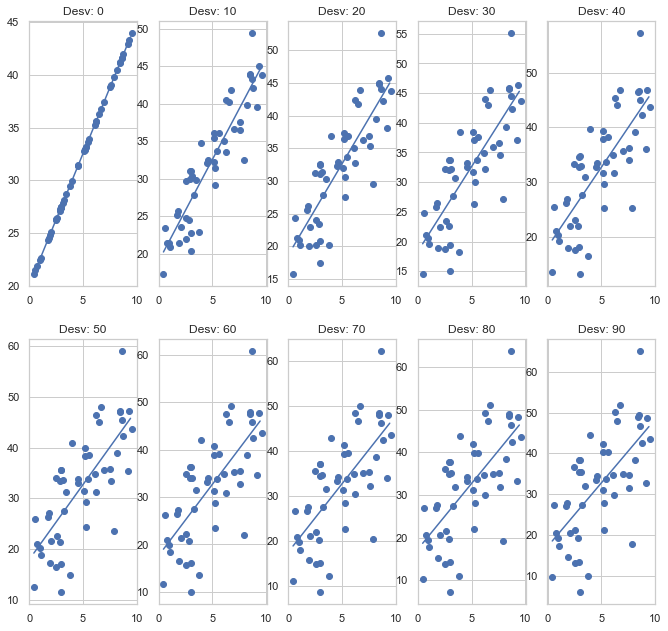

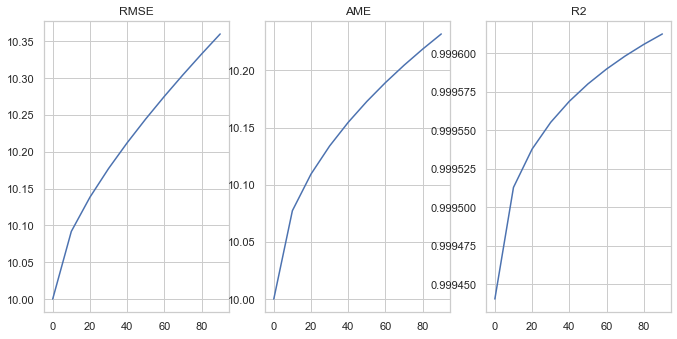

In [223]:
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import numpy as np

slope = 2.5
intercept = 10.
x_margin = (0,10)

def stats(y_obs, y_pred):
    y_mean, y_mean_pred = np.mean(y_obs),np.mean(y_pred)
    return {'rmse':np.sqrt(np.mean((y_obs-y_pred)**2)),'ame':np.mean(np.abs(y_obs - y_pred)),'r2':1 - np.sum((y_obs - y_pred)**2)/(np.sum((y_pred - y_mean_pred)**2)*np.sum((y_obs - y_mean)**2))}

def get_data(n, mean, variance):
    np.random.seed(654310)
    x = []
    y = []
    normal_values = np.random.standard_normal(n)*np.sqrt(variance) + mean
    x = np.random.uniform(0,10,n)
    for i in range(0,n):
        y.append(x[i]*slope + intercept + normal_values[i])
    return x,y
desv = np.arange(0,100,10)
fig, axs = plt.subplots(2, 5,figsize=(10,10))
stats_res = {'rmse':[],'ame':[],'r2':[]}
for j,i in enumerate(desv):
    ax = axs[int(j/5), j % 5]
    ax.title.set_text('Desv: '+str(i))
    x,y = get_data(50, 10,i)
    ax.scatter(x,y)
    X = np.array(x).reshape((-1,1))
    Y= np.array(y)
    model = LinearRegression().fit(X,Y)
    coefs = model.intercept_, model.coef_[0]
    x_plot = np.arange(np.min(X), np.max(X)).reshape((-1,1))
    y_pred = model.predict(x_plot)
    ax.plot(x_plot, y_pred)
    test = np.arange(np.min(X),np.max(X),0.1)
    y_pred = np.array([coefs[1] * i + coefs[0] for i in test])
    y_real = np.array([i*slope + intercept for i in test])
    stats_tmp = stats(y_real,y_pred)
    stats_res['rmse'].append(stats_tmp['rmse'])
    stats_res['ame'].append(stats_tmp['ame'])
    stats_res['r2'].append(stats_tmp['r2'])
fig, axs = plt.subplots(1,3,figsize= (10,5))
axs[0].plot(desv,stats_res['rmse'])
axs[0].title.set_text('RMSE')
axs[1].plot(desv,stats_res['ame'])
axs[1].title.set_text('AME')
axs[2].plot(desv,stats_res['r2'])
axs[2].title.set_text('R2')

## Loss functions o funciones de pérdida clásicas



## Técnicas de reducción de dimensión:

Comentar las tres técnicas clásicas:
* Filter methods
* Wrapper methods
* Embedded methods

### Maldición de las dimensiones:

#### Feature Selection o Selección de características.

#### Feature extraction.

#### Principal Component Analysis

PCA or Principal component analysis is a techniques widely used in machine learning to reduce the dimensionality of our problem. The main goal of PCA is reduce the total list of features while keeps the maximum amount of information. Three of the main reasons for using PCA are:
* Reduces the size of the input by a lot (each feature we reduce means $rateTraining\times nrows$ less elements in the training matrix), it speeds up the training process
* Removes noise, and fights against the curse of dimensionality
* Makes visualization possible when the maximum number of principal components is 3

**IMPORTANT** PCA is not a features selection methodology thus it will not give the top N features, but it will create from a lineal combination of the original features a data set with a reduced number of features.

Let's see first an easy example using the iris dataset. The steps that we are going to follow:
* Normalization - the idea is to bound all the values around the same (or almost the same) values, avoiding scales to have any impact on the importance of a feature.
    * Standarization - this normalization does not set the distribution to a normal distribution, it keeps the same distribution as before but sets the mean and the standard deviation to 0 and 1 respectively.
    $$\hat{X}_{ij} = \frac{X_{ij} - \mu_i}{\sigma_i}$$
    $$\mu_i = \sum_{j = 1}^nf_{ij}X_{ij}= \frac{1}{n}\sum_{j = 1}{n}X_{ij}$$
    $$\sigma_i = \sqrt{\frac{1}{n-1}\sum_{j = 1}^n(X_{ij} - \mu_i)^2}$$
    * Min-Max normalization - changes the maximum and the minimum value of a feature for max and min respectively.
    $$\hat{X}_{ij} = \frac{X_{ij} - oldMin}{oldMax - oldMin}\times newMax + newMin = \frac{X_{ij} - oldMin}{oldMax - oldMin}$$
    when $newMax = 1$ and $newMin = 0$
    * Unit vector normalization - build an unitary vector (module 1).
    $$\hat{X}_{ij} = \frac{X_{ij}}{||X_i||}$$
* Calculate covariance matrix - matriz which gives us for each feature how is its dependency with the rest.
    * To calculate the covariance matrix we have to remember:
    $$cov(x,y) = E[x - E[x]]\times E[y - E[y]]$$
    which can be translated as:
    $$\hat{cov}(x,y) = \frac{1}{n}\sum_{i = 1}^n(x_i - \hat{x})(y_i - \hat{y})$$
    $$\hat{cov}(X) = (X - 1_n\overline{X})^T (X - 1_n\overline{X})$$
* Eigen decomposition - decomponse the matrix in his eigenvectors and values. Let's begin with some basics definitions:
    * An eigenvector is a vector whose direction does not change when it suffers a linear transformation:
    $$C \mathcal{v} = \lambda \mathcal{v}$$
    where C is our covariance matrix, $\mathcal{v}$ is an eigenvector and $\lambda$ it is his eigenvalue. It is easy to see that if we write:
    $$C \mathcal{V} = \mathcal{V}\Lambda$$
    where $\mathcal{V}$ is the matrix with columns the eigenvector and $\Lambda$ is the diagonal matrix of the eigenvalues. Therefore, it is immediate to see:
    $$C = \mathcal{V}1_{\lambda}\mathcal{V}^{-1}$$
    In this case, where our objective matrix is $C$ the covariance matrix, the eigenvectors are unit vectors representing the direction of the largest variance of the data, while the eigenvalues represent the magnitude of this variance in the corresponding directions. There is another famous decomposition which is the *SVD* singular value decomposition which generalizes this same idea for non square matrixes. Given a matrix $M$ with shape $m\times n$ there is always a decomposition $M = U\Sigma V^t$ where V are complex unitary matrix, U is a complex matrix and M is a scale matrix. I will go further on this when I explain collaborative filtering methods.

    Given the decomposition:
    $$C = \mathcal{V}\Lambda\mathcal{V}^{-1}$$
    We can write it as:
    $$C = R S S R^T$$
    where $R$ is a rotation and $SS = \Lambda$ a scale matriz. Because $\Lambda$ is a diagonal matrix, then $S_{ij} = \sqrt{\Lambda_{ij}} \rightarrow S = \sqrt{\Lambda}$ because of the root square theorem. Furthermore, we can translate $RS = R_2$, by using matrix algebra properties we get:
    $$RS_{ij} = R_{ik}S_{kj} \rightarrow ((RS)_{ij})^T = RS_{ji}, \forall i,j \rightarrow ((RS)_{ij})^T = R_{jk}S_{ki} = S_{ki}R_{jk} = S^T_{ik}R^T_{kj} = S^T R^T = SR^T = SR^{-1}$$
    $$C = (RS) (RS)^T = RS S^TR^T = R_2 R_2^T$$
    $$R_2 = R \sqrt{\Lambda} = \mathcal{V}\sqrt{\Lambda}$$
    Therefore, $C$ the covariance matrix can be calculated by getting $R$ and $\sqrt{\Lambda}$, where $R$ is the matrix of eigenvectors as columns and $\sqrt{\Lambda}$ are the root square of the eigenvalues.

    An important feature that all symmetric matrixes hold is the orthogonality of its eigen vector. Therefore, $R\Lambda R$ is a diagonal matrix so in terms of PCA it is really convenient since that way we can say that $PC_1$ (principal component 1) explains more variance than $PC_2$ and so on, let's assume $\lambda_i = variance(f_i), \forall i \geq 1$, then $\lambda_1 > \lambda_2 > \dots > \lambda_n$. Furthermore, if $\sum_{i = 1}^n \lambda_i = var(C)$, then we can get the variance explained for each $PC$ as $varianceExplained(PC_i) = \frac{\lambda_i}{sum_{j = 1}^n \lambda_j}$
    

In [24]:
# Data normalization
def normalize(X, method = 'z'):
    if method == 'z':
        return (X - np.mean(X))/np.std(X)
    elif method == 'minmax':
        return (X - np.min(X)) / (np.max(X) - np.min(X))
    elif method == 'norm':
        return X / np.sqrt((np.sum(X**2)))

# Covariance between two features (X,Y)
def cova(X,Y):
    return 1/(len(X) - 1)*np.sum((X - np.mean(X))*(Y - np.mean(Y)))
# Full matrix
def cova_full(X):
    x_mean = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
    X_c = (X - np.multiply(np.ones((len(X),1)),np.transpose(x_mean)))
    return 1/len(X)*np.matmul(np.transpose(X_c),X_c)

# Eigendecomposition
def eigendecompose(X, show = False):
    values, vect = np.linalg.eig(X)
    if show:    
        x = list(range(cov_mat.shape[0]+ 1))
        cum_sum_variance = [0] + list(np.cumsum(values) / np.sum(values))
        plt.figure(figsize = (10, 10))
        plt.plot(x, cum_sum_variance)
        plt.show()
    
    

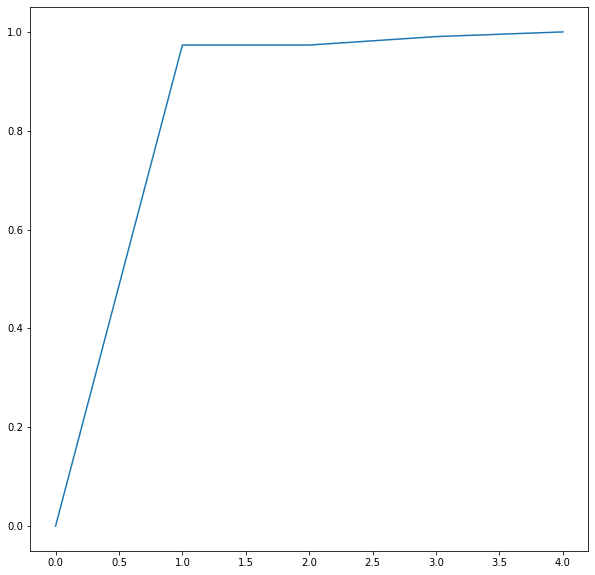

In [25]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
# Lets build the df
iris = datasets.load_iris()
features = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns = features)
iris_df['species'] = iris.target
trans_dict = {0:'setosa',1:'virginica',2:'versicolor'}
iris_df['species'] = iris_df['species'].apply(lambda x: trans_dict[x])
# Data normalization
iris_df[features] = iris_df[features].apply(normalize, method = 'z', axis = 1)
# Covariance matrix
cov_mat = cova_full(iris_df[features].values)
#cov_mat_np = (np.cov(iris_df[features].values.T))
# Eigen decomposition
eigendecompose(cov_mat, True)



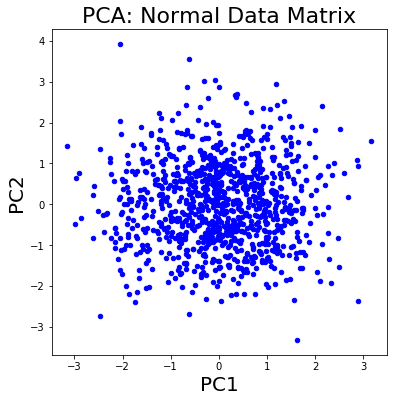

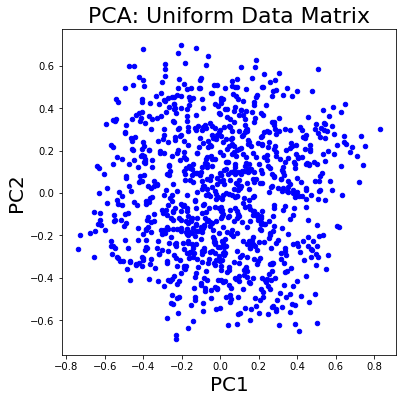

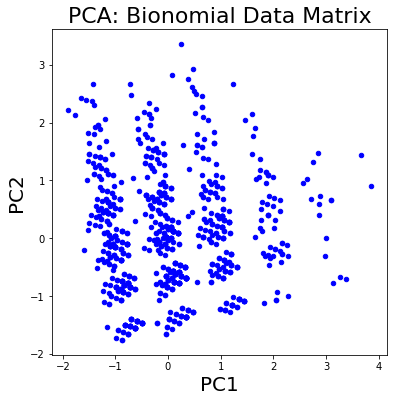

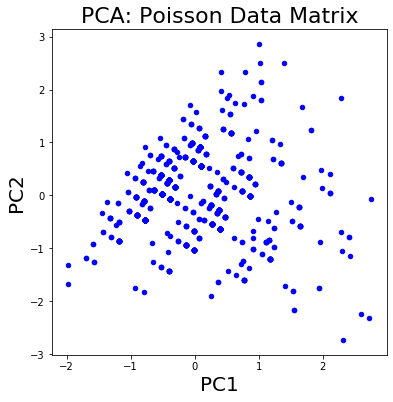

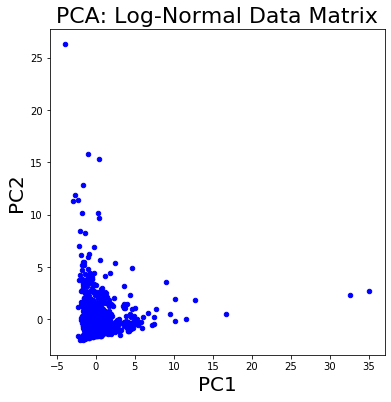

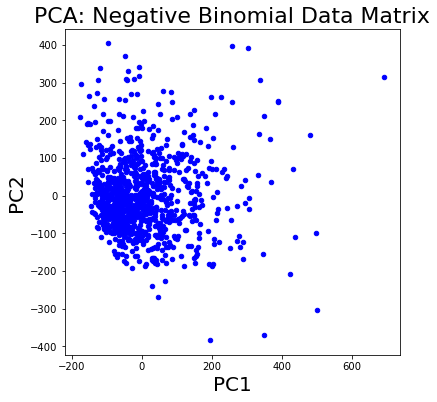

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

P = 5 # number of variables
N = 1000 # number of statistical observations / data points

def plot_PCA(data_matrix, distribution_str):
    X_reduced = PCA(n_components = 2).fit_transform(data_matrix)
    plt.figure(figsize = (6,6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 20, c = 'b')
    plt.title('PCA: ' + distribution_str + ' Data Matrix', fontsize = 22)
    plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)
    plt.show()

np.random.seed(15)

data_matrix = np.random.normal(0, 1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Normal')

data_matrix = np.random.uniform(0, 1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Uniform')

data_matrix = np.random.binomial(10, 0.1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Bionomial')

data_matrix = np.random.poisson(0.5, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Poisson')

data_matrix = np.random.lognormal(0, 1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Log-Normal')

data_matrix = np.random.negative_binomial(1, 0.01, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Negative Binomial')

#### Gradiente descendente:

Se trata de una técnica de búsqueda de mínimos (susceptible a encontrar mínimos locales) en funciones. Es utilizado mucho en el campo de machine learning (ML) y deep learning (DL) para la minimización de funciones de coste. Clásicamente la típica función de error es mínimos cuadrados:$$armin \sum_{i = 1}^{N}(y_i - \hat{y_i})^2$$

De esta manera construimos el siguiente valor de la función a partir de la dirección del gradiente. Pero que es el gradiente de una función. Dada una función $f: R^n \rightarrow R^n$ el gradiente es el vector de las derivadas parciales de dicha función, es decir $\nabla f = [..,\frac{\delta f}{\delta x_i},.., \frac{\delta f}{\delta x_n}]$. Un vector gradiente nos indica la dirección de cambio de una función $f$ en todas y cada una de sus componentes. Por tanto, seguir el gradiente (descender por el gradiente) nos informa de hacía donde se está moviendo nuestra función.

Ejemplos de gradiente:
* Asumimos $f: R^3 \rightarrow R^2$, por tanto $\nabla f: R^2 \rightarrow R^2\times R^3$

\begin{align}
  \begin{gather}
    f(x) &= 
      \begin{bmatrix}
           x_{1}^2 + x_{2}^3 \\
           x_{3}^5
      \end{bmatrix}
  \end{gather}
\end{align}

\begin{align}
  \begin{gather}
      \nabla f(x) &= 
        \begin{bmatrix}
           2x_{1} , 3x_2^2, 0  \\
           0, 0, 5x_{3}^4
         \end{bmatrix}
  \end{gather}  
\end{align}

* ¿Que requisitos se tienen que cumplir para aplicar descenso de gradiente?
    * Función convexa - es decir que la recta trazada entre todo par de puntos $(x,y)$ en deje a la curva $f$ por debajo de dicha recta. De maner matemática: $f(\lambda x + (1-\lambda) y) \leq \lambda f(x) + (1-\lambda) f(y)$
    
  <p align="center">
    <img width="460" height="300" src=figures/convex.PNG>
  </p>
      
    * Función diferenciable en todos sus puntos, es decir ha de existir derivada en todo el dominio de la función: $\delta f$
    * Existen alternativas al uso de funciones convexas, permitiendo el uso de funciones quasi convexas. Sin embargo, estas presentan situaciones arriesgadas puesto que presentan "saddle points" (sillas en EDOs) donde el algoritmo se puede quedar bloqueado. Una expresión analítica típica en estas funciones es $f(x) = x^n - m*x^n-1 + c$, with $n - 1$ odd, $m > 0$ and $c \in R$.
    
  <p align="center">
    <img width="460" height="300" src=figures/quasi_convex.PNG>
  </p>

##### Convexidad

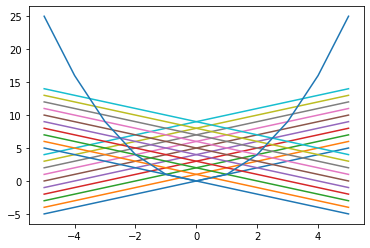

In [136]:
import matplotlib.pyplot as plt

x = list(range(-5,6))
cuts = []
for i in range(10):
    cuts.append(list(map(lambda x: x + i,x)))
for i in range(10):
    cuts.append(list(map(lambda x: -x + i,x)))
y_2 = list(map(lambda x: x**2,x))
for cut in cuts:
    plt.plot(x,cut)
plt.plot(x, y_2)


##### Diferenciabilidad/Derivabilidad


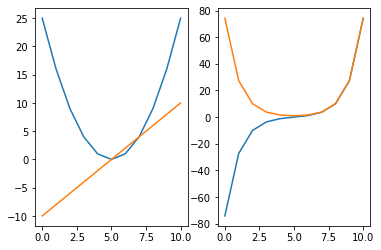

In [150]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(-5,6))
# Square funtion
y_2 = list(map(lambda x: x**2,x))
y_2_d = list(map(lambda x: 2*x,x))
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(y_2)
plt.plot(y_2_d)

# Hiperbolic sin
y_2 = list(map(lambda x: np.sinh(x),x))
y_2_d = list(map(lambda x: np.cosh(x),x))
plt.subplot(1,2,2)
plt.plot(y_2)
plt.plot(y_2_d)

##### Saddle points

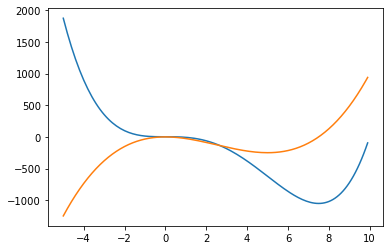

In [167]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,10,0.1)
# Square funtion
y_2 = list(map(lambda x: x**4 - 10*x**3 + 2,x))
d_y_2 = list(map(lambda x: 4*x**3 - 30*x**2 ,x))
plt.plot(x,y_2)
plt.plot(x,d_y_2)

##### Algoritmo de descenso de gradiente:

El algoritmo es super sencillo y consiste en ir redefiniendo el punto de estudio a medida que seguimos el gradiente de la función $f$ de error. Es decir, la idea es iterativamente actualizar nuestro punto $x$ de estudio desplazando este siguiendo el gradiente del error ponderado por un $\mu$ o ratio de aprendizaje.

$$x_{n+1} = x_n - \mu \nabla f(x_n)$$ 

Como se puede observar se trata de una aproximación o un esquema claramente explícito y por tanto no supone ninguna complejidad de implementación. La mayor dificultad está en obtener la función que queremos minimizar y sobre que variables derivar. A continuación se ven algunos ejemplos. Es importante observar que el ratio de aprendizaje cumple un rol sumamente importante puesto que:
* Un valor bajo tiene dos riesgos:
    * Caer más fácilmente en mínimos locales y no salir de estos.
    * Velocidad de convergencia lenta.
* Un valor alto tiene otros problemas:
    * Posibilidad de dar saltos de un lado a otro sin sentido.
* Existen versiones que manejan pasos variables pero son más complejas - descenso de gradiente con paso constante $\alpha$ o con vaso variable $\alpha(t)$.

Condiciones de parada tenemos generalmente dos:
* delta débil, $\delta_w = \frac{x_{n+1} - x_{n}}{1 + x_{n+1}} < tol$.
* delta fueret, $\delta_s = |f(x_{n+1}) - f(x_{n})| < tol$.
* Existe una tercera típicamente usada en GD que es el incremento producido en una etapa: $\mu\nabla f< tol$, que es el que usaremos.

Claramente el algoritmo de descenso de gradiente es una generalización de un algoritmo iterativo clásico como es el *Newton Raphson*. Este busca cortes por 0 y para ello va seleccionando un nuevo punto $x$ a partir de la pendiente entre una función $f$ y su gradiente $\nabla f$
$$x_{n+1} = x_{n} - \frac{f(x_n)}{\nabla f(x_{n})}$$
Es evidente que si $\nabla f(x_{n})$ es una matrix este algoritmo no valdría y tendríamos que usar notación matricial:
$$ x_{n+1} = x_{n} - f(x_n)\nabla f^{-1}(x_n)$$
Para evitar cálculos de inversas:
$$x_{n+1}f(x_n) = x_{n}f(x_n) - f(x_n)$$



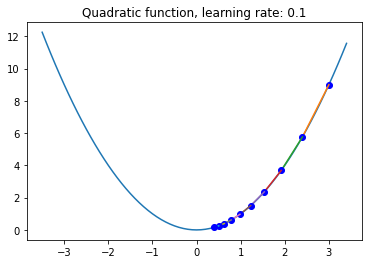

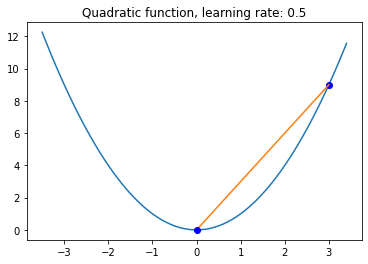

<Figure size 432x288 with 0 Axes>

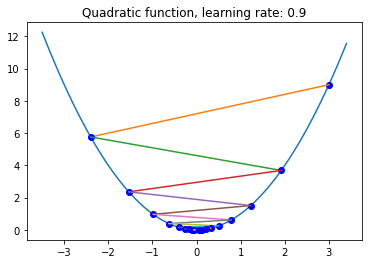

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import time

def _gradient_descendent(x_0, learn_rate, gradient, max_iter = 1000, tol = 0.1):
        plt.figure(1)
        points = [x_0]
        def _diff(x1):
            return learn_rate*gradient(x1)
        for _ in range(max_iter):
            x_1 = x_0 - learn_rate * gradient(x_0)
            points.append(x_1)
            if abs(_diff(x_1)) < tol:
                break
            x_0 = x_1
        return points
    
def function(x, f = 'quadratic'):
    if f == 'quadratic':
        return x**2
    return x

def gradient(x, f = 'quadratic'):
    if f == 'quadratic':
        return 2*x
    return 1

x_0 = 3
learn_rates = np.arange(0.1,1.0,0.4)

for learn_rate in learn_rates:
    points = _gradient_descendent(x_0, learn_rate, gradient)
    y_points = list(map(lambda x: function(x), points))
    # Plot
    x = np.arange(-3.5,3.5,0.1)
    # Square funtion
    y_2 = list(map(lambda x: function(x),x))
    fig = plt.figure()
    plt.title('Quadratic function, learning rate: '+str(learn_rate))
    plt.plot(x,y_2)
    for i, _ in enumerate(points):
        plt.plot(points[i],y_points[i],'bo')
        if i < len(points) - 1:
            plt.plot(points[i:i+2], y_points[i:i+2])


## Regresión (estadística)

La regresión es el proceso de estimar el valor esperado, o la media, de una variable de interés $Y$ a partir de un conjunto de variables explicativoas $(X_1,\dots,X_N))$. De hecho formal podemos definir la estimación de la regresión como la esperanza condicionada de $Y$ dado $X$ $$E[Y|X_1\dots X_N] = m(X_1\dots X_N)$$ Visto de esa manera entendemos que ambas $Y$ y $X$ son variables aleatorias pero claramente $X$ es independiente e $Y$ es dependiente (a priori asumiremos que esto es así). Si bien la regresión más antigua es la regresión lineal existen multitud de casos donde se pueden aplicar modelos más complejos que parten de la aplicación de funciones de enlace en los datos para "linealizar" el problema.

#### Lineal (simple y múltiple)
La regresión lineal es el más antiguo de los métodos de regresión. Como todo método de regresión trata de obtener una expresión que nos permita ajustar definir el valor esperado de una variable $Y$ a partir de una serie de variables independientes $X_1,\dots,X_k$, en el caos de la simple $k = 1$. De manera formal: $$E [Y | X_1\dots X_k] = m(X_1,\dots,X_k)$$ en caso lineal:

$$m(X_1,\dots,X_k) = MX+b$$ 
donde:
* $M: (1xk)$ vector, fila, coeficientes asociados a cada una de las features.
* $X: (kx1)$ vector, columna, $X$ de entrada.
* $b: (kx1)$ vector, columns, de "sesgos" conocido como intercepto.

¿Es la regresión lineal siempre aplicable? Desde el punto de vista estadístico, ¡NO!. Se necesitan 4 condiciones:
* Linealidad - debe existir una relación de linealidad entre la variable dependiente $Y$ y las independientes $X$. Esta es una restricción laxa pues no invalida las conclusiones, simplemente de no existir los resultados serán "malos".
* Homocedasticidad - o iguladad de varianzas, nuevamente estamos antes un problema puesto que en presencia de heterocedasticidad los resultados simplemente serán no fiables.
* Normalidad - los valores de $Y$ asociados a cada punto $X^p$, p observación, se distribuyen normalmente.
* Independencia - la presencia de multicolinealidad de grado. Si la multicolinealidad es exacta simplemente el sistema $X^TX$ es no invertible y por tanto los estimadores MCO, mínimos cuadrados ordinarios, no converge. Sin embargo, si la multicolinealidad es de grado entonces el problema tiene solución, única, pero es difícil de encontrar. Como regla general si MCO tarda en converger es probable que estemos ante un caso con multicolinealidad.

##### Ajuste de los parámetros
***MCO o Mínimos cuadrados ordinarios o Ordinary Least Square***: 
$$S(b) =\sum_{i=1}^n(y_i - x_i'b)^2 = (y - Xb)^T(y - Xb)$$ 
en este caso tratamos de resolver el problema 
$$\hat{B} = arg min S(B) = \left( \frac{1}{n}\sum_{i=1}^{n}x_ix_i'\right)\frac{1}{n}\sum_{i = 1}^n x_iy_i$$ 
Afortunadamente en este caso $\hat{B}$ presenta solución explítica y por tanto se puede determinar a partir de: 
$$\hat{B} = (X^TX)^{-1}X^Ty$$ 
De hecho en el caso más sencillo, en los modelos de regresión lineal simple, el valor del parámetro $\hat{B}$ se puede estimar de manera muy sencilla 
$$\hat{B} = \frac{Cov(x,y)}{Var(x)}$$

***Descenso de gradiente***, a mayores de MCO, que en el caso de regresión lineal presenta solución analítica, tenemos alternativas basadas en el uso de derivadas parciales para el ajuste del error (ya explicada la metodología arriba). En este caso planteamos la función de error 
$$e = \frac{1}{N}\sum_{i = 1}^{N}(y_i - \hat{y_i})^2 = \frac{1}{N}\sum_{i = 1}^{N}(y_i - mX_i - n)^2 =  \frac{1}{N}\sum_{i = 1}^{N}\left((y_i -n)^2 + m^2X_i^2 - 2mX_i(y_i-n)\right)$$

$$\frac{\delta e}{\delta m} = \frac{1}{N}\sum_{i = 1}^{N}\left( 2mX_i^2 - 2X_i(y_i-n)\right) $$

Alternativamente aplicando la regla del producto,

$$\frac{\delta e}{\delta m} = \frac{\delta e}{\delta \hat{y_i}}\frac{\delta \hat{y_i}}{\delta m} = \frac{1}{N}\sum_{i = 1}^{N}\left(2(\hat{y_i} - y_i)x_i\right) = \frac{1}{N}\sum_{i = 1}^{N}\left(2(mx_i + n - y_i)x_i\right)$$
Idem para n:

$$\frac{\delta e}{\delta n} = \frac{1}{N}\sum_{i = 1}^{N}\left( 2(y + n) - 2mX_i) \right)$$

Nuevamente a través de la regla del producto,
$$\frac{\delta e}{\delta n} = \frac{\delta e}{\delta \hat{y_i}}\frac{\delta \hat{y_i}}{\delta n} = \frac{1}{N}\sum_{i = 1}^{N}\left(2(\hat{y_i} - y_i)\right)  = \frac{1}{N}\sum_{i = 1}^{N}\left(2(mx_i + n - y_i)\right)  $$
En este caso tenemos dos parámetros a ajustar $m$ y $n$ por tanto necesitamos dos funciones de ajuste:$$m = m + \mu_1 \frac{\delta e}{\delta m}$$ $$ n = n + \mu_2 \frac{\delta e}{\delta n}$$
Donde para cada parámetro $m$ y $n$ tenemos un ratio de aprendizaje diferente $\mu_1$ y $\mu_2$ respectivamente.


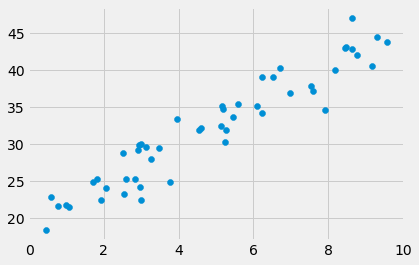

In [73]:
import random
import matplotlib.pyplot as plt
import numpy as np

slope = 2.5
intercept = 10.
x_margin = (0,10)

def get_data(n, mean, variance):
    np.random.seed(654310)
    x = []
    y = []
    normal_values = np.random.standard_normal(n)*np.sqrt(variance) + mean
    x = np.random.uniform(0,10,n)
    for i in range(0,n):
        y.append(x[i]*slope + intercept + normal_values[i])
    return x,y
x,y = get_data(50, 10,5)
plt.scatter(x,y)

Para implementar el descenso de gradiente para la regresión lineal vamos a usar el método de descenso de gradiente previamente implementado pero cambiaremos que en esta ocasión ajusta dos parámetros que trabajan de manera simultánea:
$$n_{i+1} = n + \mu_1  \frac{2}{N}\sum_{i = 1}^{N}(m_ix_i+n_i - y_i) $$
$$m_{i+1} = m + \mu_2  \frac{2}{N}\sum_{i = 1}^{N}(m_ix_i+n_i - y_i)x_i $$

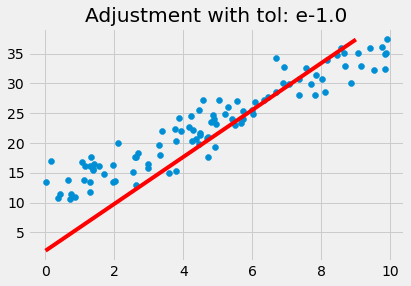

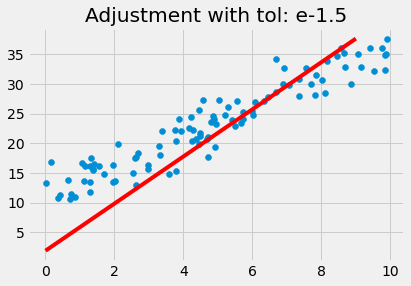

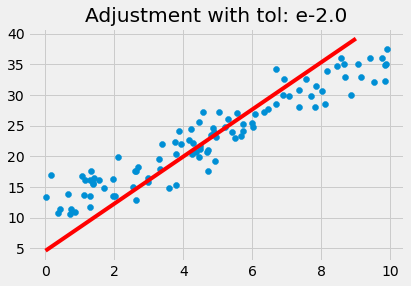

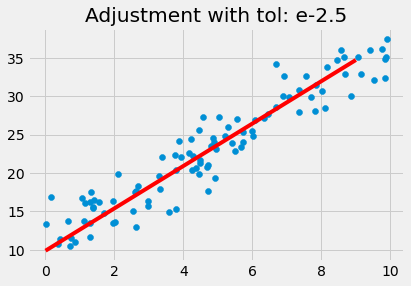

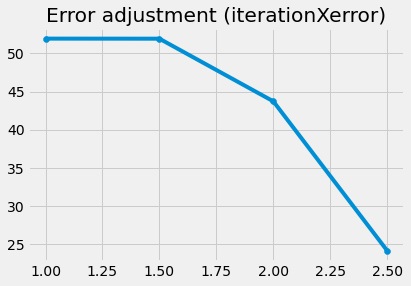

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import time

def _gradient_descendent_general(x, y, x_0, learn_rates,
                                     max_iter = 10000, tol = 1e-3):
        def _both_adjusted(adjusted):
            for b in adjusted:
                if not b:
                    return False
            return True
        def _estimate_error(m,n):
            error = 0
            for i in range(len(x)):
                error += (m*x[i] + n - y[i])**2
            return np.sqrt(error)
        N = len(x)
        m, n = x_0[0], x_0[1]
        adjusted = [False, False]
        num_its = 0
        for _ in range(max_iter):
            num_its += 1
            sum_adjust_n = 0
            sum_adjust_m = 0
            for i in range(N):
                pred = x[i]*m + n
                sum_adjust_n += (pred - y[i])
                sum_adjust_m += ((pred - y[i])*x[i])
            if _both_adjusted(adjusted):
                return m,n, _estimate_error(m,n)
            if not adjusted[0]:
                prev_m = m
                m -= learn_rates[0]*sum_adjust_m/N
                if np.abs(prev_m - m) < tol:
                    adjusted[0] = True
            if not adjusted[1]:
                prev_n = n
                n -= learn_rates[1]*sum_adjust_n/N
                if np.abs(prev_n - n) < tol:
                    adjusted[1] = True
        return m,n, _estimate_error(m,n)
x,y = get_data(100, 1,5)
errors, tols = [], []
for i in np.arange(1,3,0.5):
    m,n, error = _gradient_descendent_general(x,y, (1,1), (0.05,0.05), tol = 10**(-i))
    # Tol errors
    tols.append(i)
    errors.append(error)
    x_pred = np.arange(np.min(x), np.max(x))
    y_pred = list(map(lambda x: m*x + n, x_pred))
    plt.figure()
    plt.title('Adjustment with tol: e-'+str(i))
    plt.scatter(x,y)
    plt.plot(x_pred,y_pred, color = 'red')
plt.figure()
plt.title('Error adjustment (iterationXerror)')
plt.scatter(tols, errors)
plt.plot(tols, errors)

### GLM - Regresión lineal generalizada
Los *modelos lineales generalizados* son modelos de regresión avanzados que permiten a los errores (residuos) contener una distribución diferente de la normal (requerida en los modelos de regresión tipo el lineal). Típicamente la regresión lineal se asocia con 4 condiciones fuertes:
* Linealidad de la respuesta frente a las variables predictoras.
* Normalidad en los residuos o normalidad en las funciones de error.
* Homocedasticidad o igualdad de varianzas
* Independencia de los elementos de la muestra.

Es claro que los modelos de regresión lineal generalizada hay dos que claramente no se tienen que cumplir:
* Normalidad - por definición los errores siguen otras funciones de distribución.
* Linealidad "a priori" - puesto que los GLM permiten construir una relación lineal (similar al truco del kernel o "kernel" trick típicamente usado en técnicas como las SVM).

Elementos de las GLM:
* Función de enlace o link function - es utilizada para "transformar" una variable respuesta a un modelo ajustable como si de un modelo lineal se tratase.


<AxesSubplot:>

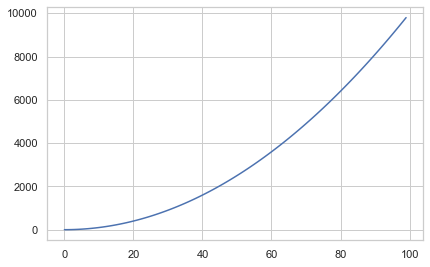

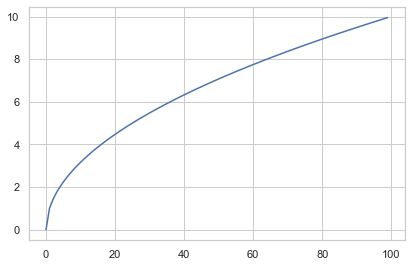

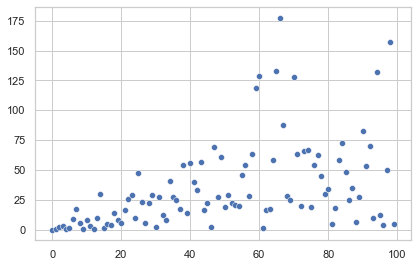

In [238]:
# Ejemplos no lineales:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = np.arange(0,100,1.0)
def y_norm_random(X):
    n = len(X)
    return np.abs(np.random.normal(size = n))*X
plt.figure()
sns.lineplot(X,X**2)
plt.figure()
sns.lineplot(X,np.sqrt(X))
plt.figure()
sns.scatterplot(X, y_norm_random(X))

**Hipótesis de los GLM**:
* Datos deben ser independientes
* La variable respuesta y, para cada X, no tiene que estar distribuida normalmente pero esta ha de seguir una distribución de una familia exponencial (binomial, poisson, muntinomial, etc).
* La variable transformada a través de la función de enlace si que debe tener una relación lineal con las variables independientes.

#### Ajustes de parámetros basados en probabilidades
A estas alturas ya casi resulta anecdótico comentar esto pero el ajuste de los parámetros de los parámetros consiste en determinar el valor de ciertas componentes desconocidas de un modelo a partir de los datos de una muestra. Para ello se hace uso de una serie de funciones típicamente conocidas como *loss functions* que miden como de lejos estamos de nuestro objetivo. Esto ya se comentó previamente en redes de neuronas y en regresión lineal y se resolvía el problema a través de mínimos cuadrados y descenso de gradiante. Sin embargo, en sistemas GLM el método de ajuste de los parámetros se realiza a través de ***Máxima verosimilitud***. En la siguiente secciones realizaremos dos ajustes de parámetros diferentes ambos basados en verosimilitud: estimación de máxima verosimilitud, MLE, y maxima verosimilitud posteriori, MAP.

***Estimación máxima verosimil o estimación basada en máxima verosimilitud***

En la estimación máxima verosimil se busca estimar un parámetro determinado tal que la verosimilitud dada la muestra X sea máxima, esto es $$argmax P(X|\theta)$$. Para ello se asume el conocimiento de la función de probabilidad $P(X)$ y esta depende de un parámetro o serie de parámetros $\theta$. Por lo tanto, si asumimos una muestra $X = \{ x_1,\dots, n_n\}$ tal que las variables son iid entonces podemos definir: $$P(X|\theta) = \prod_{i = 1}^nP(x_i|\theta)$$ De modo que es fácil ver como se construirían las diferentes estimaciones máximo verosímiles. Por ejemplo:
* Regresión lineal simple sabemos que cada valor de $y_i \sim N(\mu_i, \sigma)$ por tanto $E[y_i|x_i] = \mu_i$, pues $E[N(\mu_i, \sigma)] = \mu_i$. 
* Regresión logística sabemos que cada valor de $y_i \sim Be(p_i)$ por tanto $E[y_i|x_i] = p_i$, pues $E[Be(p_i)] = p_i$.
* Regresión de Poisson sabemos que cada valor de $y_i \sim Po(\lambda_i)$ por tanto $E[y_i|x_i] = \lambda_i$, pues $E[Po(\lambda_i)] = \lambda_i$.

***Verosimilitud a posteriori***

#### Regresión logística
La regresión logística es una regresión caracterízada porque los valores de su variable respuesta se encuentran en el rango $[0\dots 1]$. Es común pensar que la regresión logística solo vale para datos binarios o dicotomías pero puede ser generalizada a un modelo multiclasificación. Cabe recordar que la regresión logística permite predecir valores en el rango $[0 \dots 1]$, es decir permite predecir probabilidades de pertenencia/suceso/etc. Por tanto, si discretizamos el rango $[0 \dots 1]$ en 10 subniveles y cambiamos el valor predicho por clase en la que cae una predicción podemos generalizar un modelo multiclase. 

Dada la previa definición podemos formular la nueva regresión como: $$p = E[Y | X]$$ o lo que es lo mismo la responder a la pregunta ¿Cual es el valor esperado $Y_i$ si ha ocurrido $X_i$? Sin embargo, esto se ajusta a cualquier regresión por lo que podemos afinar más. Dada una distribución $Y_i \sim B(n_i,p_i)$ para $i = 1\dots m$ podemos a través de regresión logística ajustar $p_i$ como: $$p_i = E[\frac{Y_i}{n_i}| X_i]$$

Dada la definición anterior, los logits de las probabilidades se determinan a través de la función de enlace *logit* siendo esta 
$$logit(p) = log\left(\frac{p}{1 - p}\right) = y$$
 y su inversa (que será necesaria para traducir los valores estimados a probabilidades) 
 $$logit^{-1}(y)=\frac{e^y}{1 + e^y} = \frac{1}{1 + e^{-y}}$$
  En la explicación de la regresión se calcula la esperanza condicionada y en el caso particular de la lineal $E[Y|X = x^i ] = \beta_0 + \sum_j\beta_j\cdot x^i_j$. Por lo tanto, dada la definición de GLM, y dado que la RL es un tipo de GLM, la variable transformada que obtendremos será tras usar la función de enlace logit: 
  $$logit(p_i) = \beta_0 + \sum_j\beta_j\cdot x^i_i$$
   Para llegar al resultado previo podemos partir de (realmente el despeje debería ir en el sentido opuesto): 
   $$Y =  \frac{e^{(\beta_0 + \sum_i\beta_i\cdot x_i)}}{1 + e^{(\beta_0 + \sum_i\beta_i\cdot x_i)}} = \frac{1}{1 + e^{-(\beta_0 + \sum_i\beta_i\cdot x_i)}}$$
   , que despejando: 
   $$e^{-(\beta_0 + \sum_i\beta_i\cdot x_i)} = \frac{1 - Y}{Y} \rightarrow e^{(\beta_0 + \sum_i\beta_i\cdot x_i)} = \left(\frac{1 - Y}{Y}\right)^{-1} = \frac{Y}{1-Y}$$
aplicando logaritmos:
$$\beta_0 + \sum_i\beta_i\cdot x_i = ln(\frac{Y}{1 - Y}) = logit(Y)$$
 Que es de hecho la función conocida como $logit(Y)$. Aquí puede verse claramente que la aplicación de la función *logit* sobre la variable respuesta nos permite ajustar unos parámetros $\beta_i$ tal que su aplicación lineal nos permite regresar *logit(Y)* y por tanto aplicando $logit^{-1}(Y)$ podemos obtener la estimación $\hat{Y}$.

*Pregunta* ¿Los valores de los parámetros $\beta$ se pueden obtener como en una regresión lineal? Para ello tendríamos que aplicar $logit(Y)$ y regresar $logit(Y) = \beta_0 + \sum_j\beta_j\cdot x^i_i$. Sin embargo, hay un problema los valores de Y están en $\{0,1\}$ por tanto esto nos llevaría a divisiones por 0, por tanto ¡No! no se puede hacer así. La técnica es a través de *máxima verosimilitud*.

*¿Que más podemos saber?* Existe una medida que es el odds que determina la probabilidad de que suceda un evento divido entre la probabilidad de que no ocurra $\frac{\pi_i}{1 - \pi_i}$. Es decir, el odds es un ratio que mide la relación entre la probabilidad de ocurrencia y de no ocurrencia de un evento.

A partir de los coeficientes $\beta_i, i \geq 1$ se puede obtener la tasa de cambio en los odds por feature como: $e^{\beta_i}$.


<AxesSubplot:>

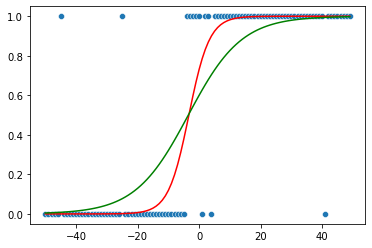

In [8]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")
intercept = 1
slope = 0.3

def logit(X, _slope = slope, _intercept = intercept):
    y_logit = X*_slope + _intercept
    return 1 / (1+np.exp(-y_logit))

def get_data_logistic(X):
    threshold = 0.5
    y_data = logit(X) + np.random.normal( 0, 0.25,size = len(X))
    y_data[y_data > threshold] = 1.0
    y_data[y_data <= threshold] = 0.0
    return y_data

X = np.arange(-50,50,1.0)
Y = get_data_logistic(X)
sns.scatterplot(X,Y)
sns.lineplot(X, logit(X), color = 'red')
X = X.reshape((-1,1))
clf = LogisticRegression(random_state=6543210).fit(X, Y)
X = X.reshape((1,-1))
Y = logit(X,clf.coef_[0][0], clf.intercept_[0])
sns.lineplot(X[0],Y[0], color = 'green')

***Estimación máximo verosimil regresión logística***, atendemos a que: $$p_i = E[y_i|x_i] = \frac{1}{1 + e^{-(\beta_0 + \sum_i x_i\beta_i)}}$$ por tanto de aquí y de la definición previa sabemos que: $$P(Y|\theta) = \prod_i P(y_i|\theta) = \prod p_i(1- p_i) = \prod_i \frac{1}{1 + e^{-(\beta_0 + \sum_j x_j^i\beta_j)}} (1 - \frac{1}{1 + e^{-(\beta_0 + \sum_j x_j^i\beta_j)}})$$ Dadas las propiedades de las probabilidades ($p>0$) podemos aplciar logaritmos y simplificar la ecuación como:
$$p = P(Y | \theta) = \sum_i ln(p_i) + \sum_i ln((1- p_i))$$ 
Si derivamos e igualamos a 0:
$$\frac{\delta p}{\delta \beta_0} = \sum_i (y_i - p_i) = 0$$
$$\frac{\delta p }{\delta \beta_i} = \sum_i (y_i - p_i)x_i = 0$$
Generalmente, estas operaciones no tienen solución y es necesario recurrir a métodos de estimación de soluciones como Newton-Raphson, punto fijo, etc.

#### Regresión de Poisson
***Pending!***

#### Regresión cuantil
***Pending!***

## Machine Learning

### Supervised Learning

#### SVM - El truco del kernel


#### UnSupervised Learning

#### Reinforcement Learning

## Deep Learning
El Deep Learning es una ciencia relativamente nueva que surge de la necesidad de ajustar modelos a funciones complejas. El deep learning hace uso de redes de neuronas para el ajuste de valores (pesos) de estas en enormes volúmenes de datos. La diferencia sustancial con el machine learning es el enfoque que se hace a la hora de entrenar. Si bien el machine learning cuenta de 4 etapas bien diferenciadas: input, feature extraction/selection, model training and output. En deep learning se juntan las etapas de feature extraction/selection + model training, en deep learning no hay procesos de extracción de características o mejor dicho es implícito al modelo en si.

<p align="center">
  <img src="figures/machine_deep.PNG" />
</p>

En base a esta imagen sacamos en claro tres relaciones:
* ML y DL son IA.
* DL es ML.
* Existe IA fuera del ML y por tanto fuera del ML y DL.

Aún así, ¿cual es la diferencia real entre ambas técnicas?

<p align="center">
  <img src="figures/levels_ml.PNG" />
</p>




El **machine learning** por ponerlo de un modo super simplificado podríamos definirlo como el proceso de aprendizaje que sigue un ordenador o un software en producción a partir de una serie de muestras (etiquetadas, aprendizaje supervisado, no etiquetadas, aprendizaje no supervisado, o a través de feedback o reglas de reward/punishment aprendizaje por refuerzo) sin estar este modo de aprender explícitamente programado. Los ejemplos más simples de machine learning podrían ser:
* Bayes naive, se trata de un sistema de machine learning (o IA) basado puramente en el teorema de bayes $P(A|B) = \frac{P(A\cap B)}{P(B)} = P(B|A)$. En este caso tendríamos algo más parecido a dadas 3 clases $C_1,C_2 y C_3$ y 4 features $F_1,F_2,F_3 y F_4$. El classificador de bayes naive calcularía, en base a la muestra de entrada, $P(C_1| F_1 = f_1, F_2 = f_2, F_3 = f_3, F_4 = f_4),\dots$. Es evidente que si $|F_i|$ es muy grande tenemos una explosión combinatoria clarísima. De hecho imaginemos que tenemos $\forall F_i \in \{F_1,\dots, F_N\}, |F_i| = count_i$, entonces tendríamos $\prod_{i = 1}^{N} count_i$ posibles combinaciones. En resumidas cuentas se vuelve inmanejable.
* Discriminante lineal de Fisher, este es ligeramente más estadístico pero sencillo igualmente. La hipótesis fuerte de partida es que las variables independientes $F_1, F_2,\dots,F_N$ del problema son independientes y $P(\vec{F}|C = c_j) = \mathcal{N}(\vec{\mu_i},\Sigma_i)$, de hecho se hace asunción de homocedasticidad por lo que $\Sigma_i = \Sigma$. Finalmente queda una expresión $\vec{x}^T\Sigma_i^{-1}\vec{\mu}_i > T$ y todo radica en estiamr ese umbral. ¿Que problemas hay aquí? $\Sigma$ no suele ser igual y además es desconocido en la mayoría de casos, puede existir multicolinealidad $\Sigma^{-1}$ puede ser complicado de calcular, etc.
* Regresión lineal, ampliamente explicado arriba.

¿Que ventajas nos ofrece el **Deep Learning**? Lo primero es entender que el deep learning como parte del ML puede verse como una vuelta de tuerca a nivel matemático y de sofisticación de los algoritmos de aprendizaje automático, ML. La típica expresión es que el DL análiza o realiza flujos de toma de decisiones cercanas o de manera similar a como lo haría un ser humano. La estructura principal en la que se soporta el DL es en las Redes de neuronas artificiales (ANN). 

<p align="center">
  <img src="figures/rna_structure.PNG" />
</p>

Esta es la típica imagen de una ANN clásica con dos capas ocultas lo que llamaríamos una ANN normal para problemas generales. Cualquier red de neuronas que presente más de dos capas ocultas generalmente es conocida como Red de neuronas profunda. El uso de estas estructuras arbitrariamente complejas, en número de capas y funciones de activación, se basa en un teorema conocido como *Universal approximation theorem*. Este teorema, grosso modo, dice que para cualquier función $f \in L^p$ es decir que su potencia p-ésima es integrable entonces existe una arquitectura de neuronas $F$ tal que aproximan la función $f$ con un error $\sigma$ dado. Además se sabe la profundidad de esa arquitectura bajo funciones $ReLU$. Esto viene a decirnos que asumiendo que todas las funciones (que esto no es cierto) p-integrables entonces existe una arquitectura basada en funciones $F$ que aproxima perfectamente dicha función. De hecho es por esto que las ANN son típicamente conocidas como **Universal function approximators**, pues pueden aprender o capturar cualquier tipo de función no lineal.

Mejor pongamos un ejemplo. Imaginemos que queremos hacer un sistema de DL que dada una imagen detecte señales de prohibido. En una metodología clásica nos tocaría coger las imágenes y vectorizarlas, es decir para cada imagen construir un vector de características con la información más relevante de dicha imagen. A mayores corremos el riesgo de tener features, variables independientes, no relevantes en dicho vector y en ML existe el famoso concepto de la maldición de las dimensiones (**TRATAR Explicar detalladamente**). Por tanto, la primera etapa sería una extracción o selección de las características más relevantes. Posteriormente ajuste de modelo, validación y test del mismo. Sin embargo, en deep learning (sobre todo si usamos un tipo de redes conocidas como redes de convolución) podemos abstraernos de toda la etapa de vectorización, selección/extracción y simplemente pasarle la imagen y delegar en la red el aprendizaje. De este modo la primera capa puede aprender a reconocer las señales, la segunda etapa colores y la tercera puntos clave que diferencien señales de STOP de PROHIBIDO de NO GIRAR, etc.

##### Que tipos de ANN tenemos a día de hoy:
Fundamentalmente podemos dividirlas en tres categorías:
* ANN clásicas y densas, redes de neuronas normales caracterizadas simplemente por su estructura interconectada con carácter forward, es decir las conexiones de la red siempre van hacia adelante.
* Redes de convolución (CNN)
* Redes de neuronas recurrentes

#### Redes de neuronas (ANN) o Feed-Forward Neural Networks

Pese a que ya se lo que "más o menos" son definámoslas de manera algo más precisa. Las redes de neuronas son un mecanismo de aprendizaje automático basado en un conjunto de datos etiquetados. Estas reciben un data set como input y producen un modelo que ofrece el mejor ajuste obtenido para dicho conjunto de entrada. A mayores en ocasiones las NN se usan como paso intermediario en procesos de  machine learning más amplios y se usan como mecanismos de extracciób de características, que posteriormente nutrirán a algoritmos de clustering, de regresión o de aprendizaje por refuerzo.

De manera algo más precisa las redes de neuronas tratan de ajustar una función $f(x)$ donde $x$ es el vector de entrada de la función y $f$ es cualquier función pudiendo ser esta desde un caso sencilla $f(x) = mx+n$, caso de relación lineal en los datos, hasta $f(x) = x_1+2*x_2+3*tanh(x_4)+\dots+$. Es decir, ajusta funciones arbitrariamente complejas. De hecho el dicho ajuste se realiza a través de la selección de funciones de activación en las neuronas y los pesos asociados a estas funciones. Cabe recalcar que en situaciones no triviales (no existencia de relaciones de índole lineal por ejemplo) las funciones de activación tienden a ser funciones más complejas como $tanh(x)$, tangente hiperbólica $\frac{cosh(x)}{senh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$, sigmoidales o logística, $\frac{1}{1 + e^{-x}}$, o  ReLU, $max(0.0,x)$. Es importante notar a partir de esta definición que las redes de neuronas precisan entradas numéricas puesto que lo que ajustan son funciones y por tanto los vectores $x$ han de estar compuestos siempre de dimensiones numéricas o "numerizables".

Las redes de neuronas nos permiten enfrentar problemas muy diversos como:
* Clasificación - dada una muestra de datos S con ejemplos etiquetados trataremos de ajustar una función $f(x)$ tal que dada una entrada $x$ produzca un valor $y$ asociado. En este campo existe también un concepto como es el umbral de clasificación que es utilizado para designar una clase dada una muestra de entrada $x$, de hecho en clasificaciones binarias existe el concepto, heredado de las telecomunicaciones, de la curva ROC. Esta permite mostrar en una gráfica la precisión y 1-especificidad bajo diferentes umbrales de corte [0..1]. Es evidente que este tipo de aprendizaje es conocido generalmente como **aprendizaje supervisado**.
* Clustering - las redes de neuronas profundas, o el conocido deep learning, permite la extracción de patrones de los conjuntos de datos sin necesidad de que exista ninguna etiqueta. Este tipo de aprendizaje se conoce como **aprendizaje no supervisado**. Como norma general los sistemas de IA, y de aprendizaje automático, se benefician de la cantidad de datos por tanto este tipo de modelos tienen el potencial de llegar a ser muy precisos.
* Regresión o predicción de valores numéricos - de igual manera que se puede predecir una clase (problemas de clasificación) podemos predecir un valor $y$ o valor esperado a partir de información pasada. De hecho, al menos desde mi punto de vista, es más natural esperar y querer obtener un valor esperado de regresión que una clase particular. Este tipo de problemas igual que en modelos de regresión generales como los: gam (generalized additive models), glm (generalize lineal models), lm (lineal models), splines, plr (polynomial lineal regression) and so on; se nutren de información pasada y tratan en base a esta de dar un valor futuro esperado. A mayores ofrecen y en contraste con metodologías clásicas de estudio de series de tiempo (ARIMA, ARMA) estas permiten la inclusión de más features abstrayéndonos así de la componente explícitamente temporal.

#### Elementos redes de neuronas

Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas. Dicho de manera sencilla una neurona es simplemente una ubicación donde la "computación" ocurre, realmente cada neurona tiene asignada una determinada función de activación y dicha función de activación se calcula para los valores de entrada.
La manera en la que se suelen organizar estas es a través de capas que generalmente son tres:
* Capa de entrada - tipicamente capa de lectura o entrada de datos. Hay una neurona por feature a tener en cuenta.
* Capa/capas ocultas - puede ser 1 o varias, 1 capa por lo general es escasa y dos suele valer para la mayoría de casos. Más alla de 2 entramos en terreno del deep learning, entendiendo este como "redes de neuronas apiladas" o "redes compuestas de muuuchas capas" (en este campo también entran en juego en ocasiones las funciones que desempeñan, convolución, las conexiones que presentan, densas, y la existencia o no de feedback).
* Capa de salida - capa con una unidad o unidades que representan las salidas de las neuronas.

Las neuronas de las distintas capas (¿puede existir conexión dentro de la misma capa?¿que significaría eso?) se conectan pero las conexiones no son siempre totalmente mantenidas, es decir, las diferentes conexiones presentan ciertos valores de ponderación [0.0, 1.0]. Lógicamente, uniones entre neuronas con pesos bajos indicarán baja implicación a la hora de la toma de la decisión (o de transición) y valores altos lo contrario.

La ejecución en una neurona se puede resumir como:

<p align="center">
  <img src="figures/rna_structure_2.PNG" />
</p>

En esta imagen es claro que para una neurona A con m entradas tenemos: $$new_X = \sum_{i = 1}^{m}w_ix_i$$, donde si en lugar de ser la capa inicial la capa de entrada tuviesemos la salida de otra capa oculta (asumiendo misma $f_{l-1}$, function de activación de la capa previa, para todas las neuronas de la capa previa) $$f_l(x) = \sum_{i = 1}^{m}w_if_{l-1}(x))$$ Que desgranando esta ecuación claramente se ve la naturaleza recursiva de las redes de neuronas y de las funciones de activación, nótese que en este caso permitimos distintas funciones de activación para cada una de las distintas capas.

Por tanto que elementos tenemos:
* Neuronas - unidad básica de cómputo "donde ocurre la magia".
    * Neuronas de entrada - función de activación $f(x) = x$ asumo que algunas versiones usarán algo tipo $f(x) = x - bias$ para eliminar algún sesgo conocido en los datos.
    * Hidden neuron o neuronas ocultas:
        * Presentan funciones de activación variopintas como las previamente comentadas. Es importante matizar que para problemas no triviales es necesario el empleo de funciones de activación que capturen comportamientos no lineales.
    * Neuronas de salida - funciones de activación $f(x) = x$, en la neurona de salida simplemente se suman los valores obtenidos en la última capa oculta ponderados con los pesos.
* Funciones de activación.
* Neurona de bias - de esto no he hablado hasta el momento pero es sumamente importante en ciertas ocasiones.
    * Imaginemos por un momento que tenemos una red con una neurona, una capa oculta (una sola neurona).
    
    <p align="center">
        <img src="figures/perceptron.PNG" />
    </p>

    * No existe función bias por tanto el resultado de nuestra red será el resultado de $f(w_0*x_0)$, asumamos $f$ una función sigmoidal ($sigmoid(x) = \frac{1}{1 + e^{-x}}$).
    
    <p align="center">
        <img src="figures/logit.PNG" />
    </p>
    
    * Se observa claramente que la modificación en peso solamente cambia la, digamos aunque no es preciso, la pendiente de la función. Sin embargo, que pasa si los datos presentan un problema de localización, ¿Como desplazamos los valores de la función sigmoidal?. Agreguemos una neurona de bías:    
    
    <p align="center">
        <img src="figures/bias.PNG" />
    </p>
    
    * A través de este bías podemos obtener una versión desplazada (transformación de localización de la función sigmoidal) que no depende de la entrada $x$, es decir: $sigmoid(x) = \frac{1}{1 + e^{-x}}$, pero con $x = x*w_0 + b_0*w_1$ (generalmente $b_0 = 1$)
    
    <p align="center">
        <img src="figures/local_logit.PNG" />
    </p>
    
#### Algoritmo de retropropagación:

* Asumamos de ahora en adelante un caso sencillo donde únicamente tenemos:
    * Capa de entrada $C_0$ + neurona bías $N_b$
    * 2 capas ocultas $C_{h0}, C_{h1}$
    * Capa de salida $C_1$
* ¿Comportamiento general? Repasemos:
    * Se recibe el input en $C_0$.
    * Las neuronas en la capa $C_1$ recibe los valores de la capa de entrada ponderada por los valores de los pesos de las conexiones. De este modo: $\forall n \in C_{h0}$ $f_n(x) = max(0.0, \sum_{i = 1}{N} w_ix_i)$, asumimos una función de activación RelU en la primera capa.
    * Las salidas de la primera capa son recibidas por neuronas de la segunda capa oculta nuevamente ponderadas por una serie de pesos. En esta capa las funcionas más típicas suelen ser las funciones sigmoidales o las tangentes hiperbólicas (funciones no lineales para ajustarse comportamientos no triviales).
    * Sin embargo, ¿es está salida buena a la primera? NO, los pesos tienen que ser reajustados. La manera tradicional es a través del algoritmo de retropropagación o el back propagation.
* Etapas de la retropropagación (por simplicidad vamos a usar un modelo de redes de neuronas lineal con una sola capa oculta, con salida multidimensional):
    * Cálculo del error cometido, para ello se usan mínimos cuadrados (al menos en las versiones generales). Tambien existen versiones que usan regularización (se comentan mas adelante): $E^p = (y^p - \hat{y}^p)$, donde $E^p$ es el error cométido en la observación p. Es importante recalcar que dado que tenemos un modelo de neuronas con una sola capa y con función de activación lineal tenemos fórmula analítica sencilla para el cálculo de $\hat{y}^p = \sum_{i = 0}^{F}\sum_{j = 0}^{NN}f(w_{ij}*x_i)$, donde $F$ es el número de features de entrada y $NN$ es el número de neuronas en la capa oculta. Si asumimos funciones de activación f(x) = x, $\hat{y} = \sum_{i = 0}^{F}\sum_{j = 0}^{NN}w_{ij}*x_i$.
    * Por tanto, tenemos: $E^p = (y^p - \sum_{i = 0}^{F}\sum_{j = 0}^{NN}w_{ij}*x_i$. Que de manera agregada se traduce en $E = \sum_p E^p$, o error global en la red.
    * Dado que se trata de una fórmula analítica podemos buscar los valores $w_{ij}$ a través de técnicas de optimización como descenso de gradiente, para ello planteamos: 
    $$\frac{\delta E}{\delta w_{ij}}$$
    que a través de la regla de la cadena: 
    $$ \frac{\delta E}{\delta y}\frac{\delta y}{\delta w_{ij}} = -2x_i(y_i - \hat{y_i})$$
    Punto importante e inmediato, el ajuste de parámetros es individual pero dependiente, es decir cada peso $w_{ij}$ presenta su fórmula de actualización que debido a como se construyen las predicciones es independiente del resto. Pero sin embargo el ajuste es dependiente puesto que cambios en un peso implican cambios en la predicción general. Por tanto obtenemos la expresión: 
    $$w^{k+1}_{ij} = w^k_{ij} - {\mu}(-2x_i(y_i - \hat{y_i}))$$ 
    Ajustando así los pesos de las distintas neuronas de la red.

***¿Tiene el backpropagation alguna limitación en deep learning?*** Existe un concepto sonado que se denomida *Vanishing and Exploding Gradient* lo que significa desaparición o explosión del gradiente. Cuando estamos ante un caso con un número de capas muy grande (redes de neuronas densas) ocurre que el gradiente puede desaparecer (si la pendiente del error es muy baja) o explotar (en caso contrario) a medida que backtrackeamos en la red. De aquí surge la necesidad y utilidad de las ***redes de neuronas recurrentes***.

***¿Tienen las ANN alguna otra limitación?*** Simple y claro, como procesas imágenes en una ANN. 
* Vectorizas la imagen:
    * primer problema ¿como se procesan imágenes de diferentes tamaños? Presentarán vectores diferentes y por tanto el número de parámetros de entrenamiento crece.
    * información espacial - se pierde la información espacial cuando vectorizamos, especialmente si lo hacemos de manera independiente del tamaño de la imagen.
Solución: ***redes de convolución (CNN)***

#### Ajustes de Neural networks clásicos:
Stochastic Gradient Descent, Adam, or L-BFGS.

* sklearn:
    * solvers - sistema usado para el ajuste de los pesos de las neuronas:
        * Stochastic Gradient Descent (SGD) - funciona exactamente igual que el gradiente descendente pero en lugar de usar todos los datos para el cálculo del gradiente usa muestra aleatoria de los datos (la reutiliza en cada etapa o construye una nueva).
        * Adam - se trata de una optimización del SGD general:
            * En lugar de usar un ratio de aprendizaje general presenta uno por parámetro a ajustar.
            * El ratio de aprendizaje no es estático general sino que varia a lo largo de las ejecuciones (especialmente útil para casos dinámicos o con ruido).
            * Eficaz en computer vision, NLP, etc.
        * L-BFGS - es la versión con limitación de memoria del algoritmo BFGS que es un algoritmo iterativo de optimización de funciones sin restricciones.
    * $\alpha$ - parámetro clásico de regularización:
        * Creo que por defecto maneja regularización L2 o Ridge. Esta se basa en usar una función de pérdida tal que: $$Loss_{new} = Loss + \alpha\sqrt{\sum w_{ij}}$$
        * $\alpha$ = 0 - ajuste lineal.
        * $\alpha$ = $\infty$ - todos los coeficientes cercanos (ojo cercanos con Ridge no llegan a 0).
        * 0 < $\alpha$ < $\infty$ - manejamos el sobreajuste del modelo.
        * Nos permite definir la función de pérdida en regresión como: $$Loss(y,\hat{y}, W) = \frac{1}{2}||y - \hat{y}||^2\frac{\alpha}{2} ||W||^2$$ y para clasificación se usa la función de pérdida Cross-Entropy (para dos clases): 
        $$Loss(y,\hat{y}) = -\sum_{i = 1}^n y_ilog(\hat{y_i}) + (1 - y_i)log(1 - \hat{y}_i)$$
        Para C clases:
        $$Loss(y, \hat{y}) = -\sum_{i = 1}^n \sum_{c \in C} y_{oc} log(\hat{p}_{oc}) $$
        donde:
            * $y_{oc}$ toma valores 1 o 0 dependiendo de si la observación está correcta o incorrectamente clasificada.
            * $log(\hat{p}_{oc})$ - es la probabilidad de que o pertenezca a la clase c.
    * hidden_layer_sizes:
        * Siempre son dos capas
        * Número de neuronas por capa
    * random_state - seed.

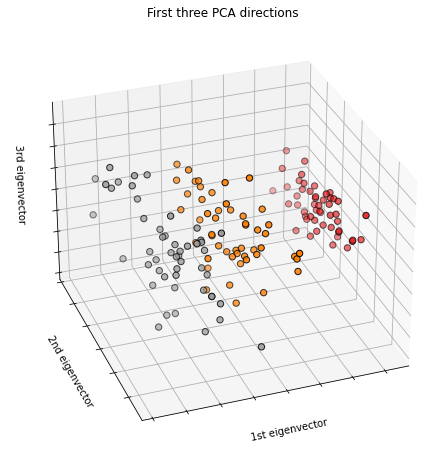

<AxesSubplot:>

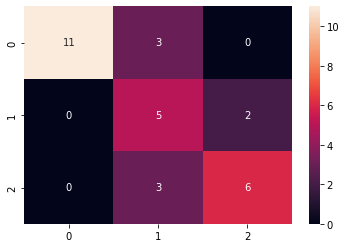

In [100]:
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
# Visualize the dataset just retrieving 3 different features by using PCA.
def _3dPlot(X, y):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    # Applied Principal Component Analysis to be able to visualize data
    X_reduced = PCA(n_components=3).fit_transform(iris.data) 
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
# Visualization
_3dPlot(X,y)
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=654321)
# Build the MLP Classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)    
sns.heatmap(cm, annot=True)

* Ajuste manual de una ANN para la regresión lineal:

[[<__main__.neuron object at 0x0000018A8030AF08>, <__main__.neuron object at 0x0000018A80321148>], [<__main__.neuron object at 0x0000018A80321208>, <__main__.neuron object at 0x0000018A80321288>, <__main__.neuron object at 0x0000018A803212C8>, <__main__.neuron object at 0x0000018A80321308>], [<__main__.neuron object at 0x0000018A802A9D88>]]
[[[1.0], [1.0]], [[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]], [[1.0, 1.0, 1.0, 1.0]]]


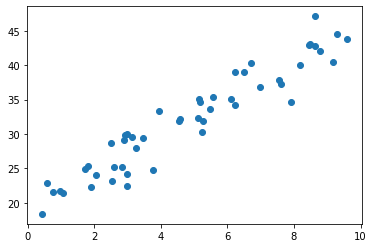

In [34]:
import random
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

class neuron():
    def __activation_function(self,x):
        if kind == 'bound':
            return x
        else:
            return 1 / (1 + np.exp(-x))
        
    def __init__(self,kind):
        self.kind = kind
        
    def activate(self,x):
        return self.__activation_function(x)
    
class net():
    def __loss(self, y, y_hat):
        # Rmse
        return np.sqrt(np.sum((y - y_hat)**2))
    def __init__(self,scheme):
        self._layers = []
        self.__tol = 1e-4
        for i, neurons in enumerate(scheme):
            self._layers.append([])
            for _ in range(neurons):
                self._layers[i].append(neuron('inner'))
        self._layers.append([neuron('bound')])
        print(self._layers)
    def __get_preds(X):
        for i in self.
        
    def fit(self,X,y):
        if len(X.shape) == 1:
            size_entry = 1
        else:
            size_entry = X.shape[1]
        self.__weights = []
        for i in range(len(self._layers)):
            if i == 0:
                prev_entry_size = size_entry
            else:
                prev_entry_size = len(self._layers[i-1])
            self.__weights.append([])
            for _ in range(len(self._layers[i])):
                self.__weights[i].append([1.]*prev_entry_size)
        print(self.__weights)

slope = 2.5
intercept = 10.
x_margin = (0,10)

def get_data(n, mean, variance):
    np.random.seed(654310)
    x = []
    y = []
    normal_values = np.random.standard_normal(n)*np.sqrt(variance) + mean
    x = np.random.uniform(0,10,n)
    for i in range(0,n):
        y.append(x[i]*slope + intercept + normal_values[i])
    return x,y


x,y = get_data(50, 10,5)
plt.scatter(x,y)

N = net([2,4])
N.fit(x,y)

#### Recurrent Neural Networks (RNN)

De manera introductoria direcmos que las RNN son un tipo de redes de neurona que recuerdan sus entradas, debido a que presentan mecanismos de memoria interna (que veremos más adelante). Los principales usos de las RNNs se encuentra en el *Natural Language Processing* y en tratamiento de *Time Series*.

Las RNN recuerdan las partes más *importantes* de la entrada que recibieron, lo que les permite desgranar el trigo de la paja de una manera bastante atinada. Por tanto, este tipo de redes es especialmente interesante para trabajar sobre datos de carácter secuencial (datos ordenados o datos donde existe un orden preestablecido por ejemplo el DNA) donde el momento en el que toma un valor es más importante que el valor en si tomado en ese instante específico, es decir, que el tiempo y la secuencialidad son de suma importancia.

* ¿Como implementan la memoria interna?

Una red de neuronas general una *Feed-forward* solamente mueve la información desde la entrada hasta la salida y por tanto solo "recuerdan" los datos de entrenamiento. Este recuerdo es a través del ajuste que ha hecho sobre los pesos de las conexiones entre las distintas capas. Sin embargo, en el caso de las RNN existen bucles que unen la salida de una neurona con la propia neurona. De este modo la neurona no solo se nutre de la información de la capa previa sino que también se nutre de su propio aprendizaje. Es decir, la neurona $j$ de la capa $i$ ofrecen como output $f(\sum_i w_i f_{i-1}(x) + f_{ij}(\dots)$, where $f_{i-1}$ are the outputs from the previous layer, and $f_{ij}$ is the output for the neuron $j$ in the layer $i$. Dado que la manera tradicional de funcionar es con un loop por neurona en cada capa la cantidad de memoria que pueden guardar es escasa y por eso se dicen de "Memoria corta" (un poco como los modelos de Markov de orden 1, $P(X_i|X_{i-1} = x_{i-1},\dots,X_1 = x_1) = P(X_i = x_i|X_{i-1} = x_{i-1})$). Sin embargo, estas se pueden combinar con Long-Short Term Memory para incrementar esa memoria.

<p align="center">
    <img src="figures/recurrent_ff.PNG" />
</p>

(source: builtin.com)

En resumidas cuentas las RNN más básicas simplemente incluyen la información pasada de carácter más inmediato al presente.

Además en este contexto encontramos diferentes tipos de RNNs como:
* One to one - como las redes de neuronas generales donde dada una entrada producimos una única salida.
* One to Many - donde dada una entrada producimos varias posibles soluciones.
* Many to Many - donde dadas varias entradas se producen mútiples salidas.
* Many to one - donde varias entradas producen una única salida.

<p align="center">
    <img src="figures/one_many_many.PNG" />
</p>

##### Keras, RNN y LSTM

Esto es algo raro de primeras puesto que *a priori* ajustar estos modelos debería ser cosa de 5 minutos. Sin embargo, primero es necesario entender como estos reciben los datos. Para ajustar este tipo de modelos es necesario especificar 2 cosas:
* Timestep - paso de tiempo que se va a usar para cada una de las predicciones.
* Number of features o número de características - número de factores que vamos a utilizar a la hora de ajustar nuestros modelos.
Por tanto, LSTM recibirá no vectores sino matrices tridimensionales donde:
* Cada fila $i$ es un ejemplo.
* Cada ejemplo tiene que tener $nf$ número de características.
* Cada número de caracterísitcas tiene que estar replicado $ts$ veces.

Por ejemplo:
* S_1 - tenemos 2 observaciones con un timestep de 1 y 3 features.

\begin{align}
  \begin{gather}
    S_1 &= 
    \begin{bmatrix}
           [1], [2], [3] \\
           [0], [0], [1]
    \end{bmatrix}
  \end{gather}
\end{align}

\begin{align}
  \begin{gather}
  y_1 &= 
    \begin{bmatrix}
           6\\ 1
    \end{bmatrix}
  \end{gather}
\end{align}
  
* S_2 - tenemos 6 observaciones con un timestep de 2 y 1 feature.

\begin{align}
  \begin{gather}
    S_2 &= 
    \begin{bmatrix}
           [1,2]\\ [3,4] \\ [5,6] \\
           [7,8]\\ [8,9] \\ [9,10]
    \end{bmatrix}
  \end{gather}
\end{align}

  \begin{align}
    \begin{gather}
      S_2 &= 
      \begin{bmatrix}
           3\\ 5\\ 7 \\
           9\\ 11\\13 
      \end{bmatrix}
    \end{gather}
  \end{align}

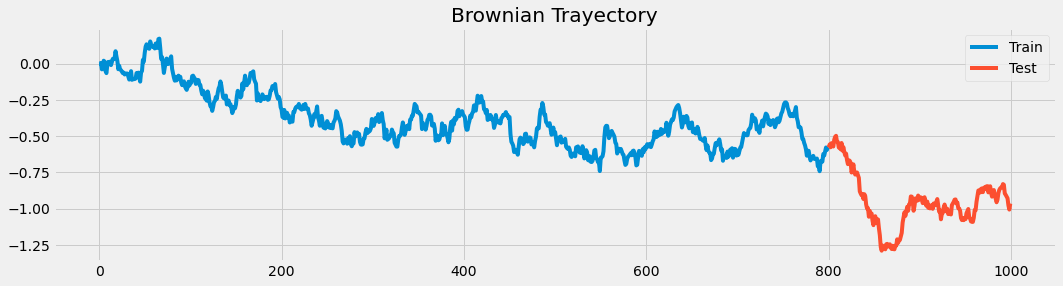

(680, 60, 1)
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_37 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_38 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_39 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)  

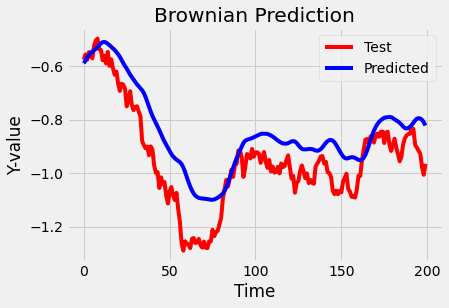

The root mean squared error is 0.11923566081110332.


In [71]:
# Ejemplos - adaptar para los genomas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
np.random.seed(6543210)

# Extra functions
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Test')
    plt.plot(predicted, color='blue',label='Predicted')
    plt.title('Brownian Prediction')
    plt.xlabel('Time')
    plt.ylabel('Y-value')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Simulate brownian trayectory
sampleSize = 1000
t = list(range(0,sampleSize,1))
Xt = np.random.standard_normal(sampleSize)
bR = [0]*sampleSize
dt = 1 / sampleSize
for i in range(1,sampleSize - 1):
    bR[i+1] = bR[i] + np.sqrt(dt)*Xt[i]
test_perc = 0.2
train_size = int(sampleSize*(1-test_perc))
bR = np.array(bR).reshape(-1, 1)
train = np.array(bR[:train_size])
test = np.array(bR[(train_size):])
# Plot
plt.figure(figsize = (16,4))
plt.plot(list(range(0,train_size)),train)
plt.plot(list(range(train_size,sampleSize)),test)
plt.legend(['Train','Test'])
plt.title('Brownian Trayectory')
plt.show()

## Normalize the data to avoid bias
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

## Build sample - look at the format
X_train = []
y_train = []
for i in range(60,train_size-60):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))
# Lets define the optimizer rmsprop - similar to Adam
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

regressor.summary()
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2, verbose = 0)

## Preping the test
bR_scale = sc.transform(bR)
X_test = []
for i in range(train_size, sampleSize):
    X_test.append(bR_scale[i - 60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
brownian_prediction_trans = regressor.predict(X_test)
brownian_prediction = sc.inverse_transform(brownian_prediction_trans)

## Plot results
plot_predictions(test,brownian_prediction)
return_rmse(test, brownian_prediction)

### Diferencia con los HMM

Una duda que a mi me surgió en el momento en el que empecé a estudiar las RNN (LSTM) es, ¿que los diferencia de modelos estocásticos tradicionales como los HMM (Hiden Markov Models)? Veamos que es cada cosa:

#### HMM

Nuestro experimentos serán todos sobre genomas por lo que el conjunto de estados será discretos (pueden ser grandes pero discretos igualmente) y el espacio de tiempos lo mismo dado que estamos limitados a la longitud de estos.

Por un lado tenemos los Modelos ocultos de Markov, HMM, que se pueden definir como una extensión de los clásicos procesos de Markov. Estos procesos los vimos en clase de teoría y se pueden resumir como una serie de especial de procesos estocásticos (conjunto de variables aleatorias, en nuestro caso serán discretos) donde la probabilidad de que ocurra un determinado evento solamente depende del evento del instante inmediatamente anterior. Esto de manera matemática lo podemos formular como: *Un proceso de Markov discreto o una cadena de Markov es un proceso estocástico de tiempo discreto $\{X_i: n = 0, 1, \dots,n\} $ y espacio de estados discreto $S$ y que para cualquier $x_0, x_1,\dots, x_{n+1} \in S$ se satisface que: $P[X_{n+1} = x_{n+1} | X_i = x_i,~con i \leq n] = P[X_{n+1} = x_{n+1} | X_n = x_n]$*. La diferencia sustancial que existe entre estos modelos de markov (discretos completamente) y los modelos ocultos de Markov reside en que en el segundo caso los estados se consideran ocultos y deben ser inferidos de las observaciones. Estos se componen de:
* N: número de estados ocultos, pese a ser desconocido puede estimarse a un número suficientemente alto y posteriormente ser ajustados.
* M: número de símbolos observados por estado.
* $\vec{S}$ es la secuencia de estado con $\vec{S} = (s_1,\dots,s_T)$, T es la longitud de la secuencia y cada $s_i \in \{1,dots,N\}$.
* A: matriz de transición entre estados, probabilidad de ir al estado $j$ desde el estado $i$: $a_{ij} = p(s_{t+1} = j | s_t = i)$
* B: distribución de observaciones por estado: $b(k) = p(o_t = k| s_t = i)$
* $\vec{\pi}$ distribución inicial: $\vec{\pi}_i = p(s_1 = i)$
Se denomina $\lambda$ a la 3-tupla de los parámetros del HMM,  $\lambda = (A,B,\vec{\pi})$

Nuestro propósito final es calcular $\alpha = P(\vec{O}|\lambda)$, probabilidad de observar una secuencia dada la 3-tupla $\lambda$, se usa tradicionalmente el forward-backward algorithm. Sin embargo, esto como puede verse depende de $\lambda = (A,B,\pi)$ por tanto es necesario calcular $\lambda$ de la muestra. 
* Como estimar la probabilidad de $\lambda$
    * La manera general de hacerlo es:
        * Si podemos mapear la muestra a los distintos estados:
            * Si estos son discretos - simplemente podemos usar estimaciones generales de la función de densidad:
                * histogramas - problemas con los puntos de inicio, tamaño de ventana, etc.
                * Mejor usar estimaciones locales (kde - kernel density estimation) - un ejemplo empleado podría ser el estimador de Nadaraya Watson con un kernel gaussiano y una ventana calculada a través del estimador de Sheather and Jones.
            * Si son continuos hay dos opciones:
                * Con una gaussiana llega: $b_i(x) = p(x| s_t = i) = \mathcal{N}(x;\mu_i,\Sigma_i)$
                * Si es necesario una mixtura de gaussianas: $b_i(x) = p(x| s_t = i) = \sum_{m = 1}^Mc_{im}\mathcal{N}(x;\mu_{im},\Sigma_{im})$
        * Si esto no es posible (o incluso siendo posible para refinar el ajuste del modelo):
            * Emplearíamos el algoritmo de ***Baum-Welch*** que es una versión particular del clásico Expectation Maximization (EM). Se trata de un algoritmo iterativo formado por tres partes:
                * **Forward** definimos $\alpha_i(t) = P(O_1 = o_1,\dots,O_t = o_t, X_t = i|\lambda)$ esto se obtiene a partir de:

                $$\alpha_i(1) = \pi_ib_i(o_1)$$ 
                $$\alpha_{i}(t+1) = b_i(o_{t+1})\sum_{j=1}^N \alpha_j(t)a_{ij}$$

                * **Backward** definimos $\beta_i(t) = P(O_{t+1} = o_{t+1},\dots,O_T = o_T|X_t = i,\lambda)$ esto se obtiene a partir de: 
                
                $$\beta_i(T) = 1$$ 
                $$\beta_{i}(t) =\sum_{j=1}^N \beta_j(t+1) a_{ij} b_{j}(o_{t+1})$$

                * **Update** para ello podemos definir(fuente *wiki*): 
                
                $$\gamma_i(t) = P(X_t = i|O,\lambda)= \frac{P(X_t = i,O|\lambda)}{P(O|\lambda)} = \frac{\alpha_i(t) \beta_i(t)}{\sum_{j = 1}^N\alpha_j(t) \beta_j(t)}$$

                esto da la probabilidad de estar en el estado $i$ en el instante $t$ en el caso de tener la matriz de observaciones O y la tupla $\lambda$. 

                $$\epsilon_{ij}(t) = P(X_t = i,X_{t+1} = j|O,\lambda) = \frac{P(X_t = i,X_{t+1} =j,Y|\lambda)}{P(O|\lambda)} = \frac{\alpha_i(t)a_{ij}\beta_j(t+1)b_j(y_{t+1})}{\sum_{k = 1}^N\sum_{w=1}^N\alpha_k(t)a_{kw}\beta_w(t+1)b_w(y_{t+1})}$$
                
                A partir de estos se definirían los valores actualizados de $a_{ij}$, $\pi_i$ y $b_i(o_k)$
                    
                ¿Problemas?¿Que es $O$?. Efectivamente esto solo vale en el caso de tener una sola secuencia $O$ dada, pero eso para la mayoría de casos no es interesante (especialmente si luego pretendemos ajustar una LSTM que requiere de abundante información para ajustar la red). Para ajustar el algoritmo simplemente hay que ajustar los valores de actualización teniendo en cuenta que las observaciones son independientes unas de otras. Finalmente quedaría:
                $$\pi_i = \frac{\sum_{k = 1}^K\gamma_{ik}(1)}{K}$$

                $$a_{ij} = \frac{\sum_{k=1}^K\sum_{t=1}^{T-1}\epsilon_{ijr}(t)}{\sum_{k=1}^K\sum_{t=1}^{T-1}\gamma{ir}(t)}$$

                $$b_i(o_k) = \frac{\sum_{k=1}^K\sum_{t=1}^{T}1_{o_{tr} = o_k}\gamma_{ir}(t)}{\sum_{k=1}^K\sum_{t=1}^{T-1}\gamma{ir}(t)}$$
                
                La única parte algo *extraña* es $1_{o_{tr} = o_k}$ esto determina para cada instante de tiempo $t \to T$ si la observación $o_k = o_{tr}$, es decir el número esperado de veces que la secuencia $O$ tomará el valor $o_k$.

Como recordatorio, nuestro propósito es calcular $\alpha = P(\vec{O}|\lambda)$ pero para cada instante de tiempo $t$ de manera incremental. Esto es:
$$t = 1,\alpha = P(O = (o_1)|\lambda)$$
$$t = 2,\alpha = P(O = (o_1,o_2)|\lambda)$$
$$\dots$$
$$t = T,\alpha = P(O = (o_1,o_2,\dots,o_T)|\lambda)$$


#### ¿De donde surge la necesidad de las RNN?

En una metodología *feed forward* tradicional se asume que el orden de los datos es independiente, es decir, *time does not matter* pero en muchos casos como series de tiempo, NLP, reconocimiento del habla o procesamiento de DNA el orden de los datos cumple un factor determinante. Para solventar esto surgen las redes de neuronas recurrentes que usan la información de predicciones previas para ajustar predicciones futuras:

<p align="center">
    <img src="figures/rnn.PNG" />
</p>

Esta imagen lo representa muy bien y deja claro que para cada $x_i$ se construye una red de neuronas que predice un valor $y_i$ y a su vez esta salida nutre con un peso $w$ (generalmente el mismo para los distintos pasos de tiempo) la entrada de la siguiente capa. Nótese que en el ejemplo se representa un caso *many to many* pero que esto no siempre tiene porque ser así:
* *many to many* o muchos a muchos - traductor
* *many to one* o muchos a uno - análisis de sentimiento (o incluso podría ser nuestro caso una secuencia de nucleótidos de longitud K, y predecir cual es el siguiente)
* *one to many* o uno a muchos - análisis de imágenes
* *one to one* o uno a uno - clasificación estándar

Sin embargo, de manera matemática podríamos definir todos de la misma manera:
$$f_{t+1}(x_{t+1}) = \sum_{i=1}^Iw_{t+1}\cdot x^{(i)}_{t+1}+V\cdot f_{t}(x_t)$$
$$y_t = sigmoid(f_{t}(x_t)) = \frac{1}{1 + e^{-f(x_t)}}$$
Donde:
* Asumimos por simplicidad que la capa oculta tiene una sola neurona, en el caso de tener varias simplemente tendríamos:
$$f_{t+1}(x_{t+1}) = (f_{t}^1(\sum_{i=1}^Iw^j_i\cdot x^{(i)}_{t+1}+V\cdot f_{t}(x_t)),\dots,f_{t}^J(\sum_{i=1}^Iw^J_i\cdot x^{(i)}_{t+1}+V\cdot f_{t}(x_t))$$
$$y_t = \frac{1}{1 + e^{-\sum_j^Jf^j_t(x_t)}}$$
    
* J es el número de neuronas en cada red en cada instante.    
* t es el instante de tiempo
* f es el resultado de la aplicación de la red en el instante de tiempo $t$
    * $f^j_t(\cdot)$ es la función de activación $j$
* $w^j_i$ es el peso del input $i$-ésimo en la neurona $j$
* $V$ es el vector de pesos de conexión con el instante de tiempo previo

Para el ajuste de los pesos se utiliza una versión del *back propagation* conocida como *back propagation through time* que es lo mismo que backpropagation normal pero incluyendo las derivadas con respecto de $v_j$ para ajustar la componente de $feedback$. En este caso dependiendo del problema en cuestión se pueden definir diversas funciones de pérdida:
* Entropía cruzada (utilizada en clasificación)

$$J^t_o(Y) = - \sum_m^M y_{otm}log(\hat{y}_{otm})$$

* M sería el número de clases que se tienen de salida.
* Es algo extraña pero si pensamos en términos absolutos $y_{t,j} = 0,\forall j \neq C$ donde $C$ es la clase de la observación.
* Esto sería para cada observación, por tanto habría que ajustarlo para todas las observaciones e instantes de tiempo.

$$J(Y) = - \frac{1}{|O|T}\sum_o^O\sum_t^T\sum_m^M y_{tm}log(\hat{y}_{tm})$$

* En caso de regresión o incluso en clasificación existen otras métricas, dado que nuestro caso debería ser de clasificación nos quedamos así.

Como último detalle existe un problema conocido con las RNN que algunas redes (como las LSTM) buscan corregir y este es el *Vanishing/Exploding gradient*, es decir cuando se acumulan muchas capas ocultas es posible que el gradiente se decrezca o crezca exponencialmente generando problemas en el ajuste.

<p align="center">
    <img src="figures/vanishing_exploding.PNG" />
</p>

Para visualizarlo de manera simple pensemos en una red de neuronas de 10 capas ocultas con 1 neurona por capa. Para el ajuste de los pesos de la capa 1 tendríamos que tener en cuenta que:
* La predicción vendría dada por:
$$\hat{y} = w^{10}f^{10}(w^{9}f^9(w^8f^8(\dots w_1f^1(x))))))$$
Por tanto, usando un $RMSE$ general por simplicidad:
$$y - \hat{y} = y - w^{10}f^{10}(w^{9}f^9(w^8f^8(\dots w_1f^1(x))))))$$
Por lo que ajustar el peso $w_1$ implica:
$$\frac{\delta (y - w^{10}f^{10}(w^{9}f^9(w^8f^8(\dots w_1f^1(x))))))}{\delta w_1}$$
Aplicando la regla de la cadena llegaríamos a:
$$\frac{\delta f^{10}}{\delta f^9}\dots\frac{\delta f^1 }{\delta w_1}$$


#### Convolutional neural networks (CNN)



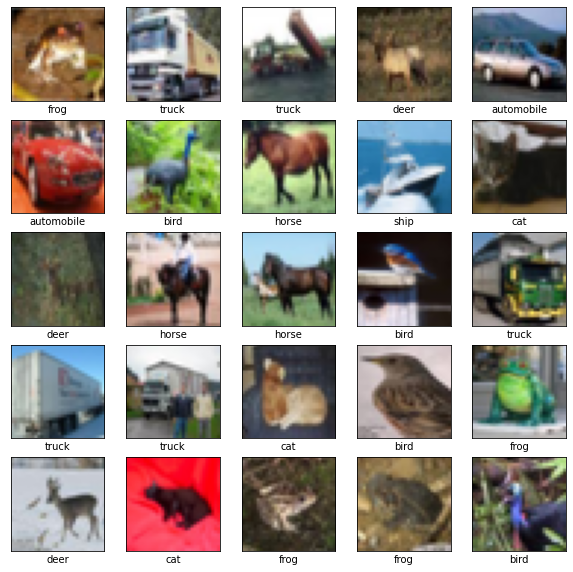

In [10]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualizamos las imagenes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Manejo del Overfitting

Se trata de uno de los problemas más típicos de errores o sesgos en los sistemas ML/DL.
* ¿En que consiste el overfitting?:
    * Casuística típica en modelos de ML/DL que sucede cuando el modelo ajustado es ideal o incluso casi perfecto sobre la muestra de entrenamiento pero al usar datos de test el modelo es incapaz de obtener buenos resultados. Por lo tanto, el modelo se ha aprendido los casos de test a la perfección pero falla a la hora de generalizar nuevos resultados.

* ¿Que causa el overfitting?:
    * Muestra sencilla - sin casos extremos.
    * Demasiada complejidad del modelo ajustado.
    * Demasiado número de epocs
* ¿Como evitarlo?
    * Feature selection o feature extraction - eliminamos maldición de las dimensiones, siempre ayuda a reducir la complejidad de los modelos (reducimos la dimensión del espacio).
    * Métodos ensemble o embedded - métodos que combinan modelos de ML/DL sencillos enlazados unos tras otros para obtener unas predicciones de calidad.
    * Simplificación del modelo (esto entra dentro de los *Embedded methods* explciados en la sección de métodos de reducción de la dimensionalidad):
        * Regularización - simplificación del modelo a través de la eliminación de coeficientes (parámetros del modelo):
            * L1 o LASSO
            * L2 o Ridge
        * Cambio en hiperparámetros para reducir la complejidad de este.
    * Construcciones de muestras más representativas o más completas. Por lo general, una buena medida de *mitigar* o controlar el overfitting es incrementar el tamaño de la muestra.
    * Modificación de los datos:
        * Opción A: Cada vez que el algoritmo se ajuste que sea con datos de entrenamiento diferente de esta manera no podrá estar adaptado a estos.
        * Opción B: Añadir ruido sintéticamente a la muestra.
        * Opción C: Hacer la muestra artificialmente más compleja.
* ¿Como detectarlo?
    * Opción sobre hiperparámetros: comparar resultados de validación y training a medida que se ajusta el modelo. Esta opción es válida por ejemplo para detectar la presencia de hiperparámetros poco interesantes.
    * Opción sobre epocs: medir en cada iteración del algoritmo los resultados o la calidad de los ajsutes de validación y ver si efectivamente los resultados se estancan o si empeoran:

***Ejemplo***

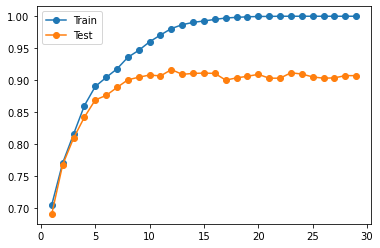

In [118]:
# Examples Python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
n_features = 30
n_informative = 5
sample_size = 10000
# create dataset
X, y = make_classification(n_samples=sample_size, n_features=n_features, n_informative=n_informative, n_redundant=n_features - n_informative, random_state=6543210)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, n_features)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

#### Ensemble learning:

* Bagging
* Boosting
* Stacking


In [ ]:
# Examples Python

## Prácticas ml

In [101]:
from __future__ import absolute_import, division, print_function
import warnings

import warnings
warnings.filterwarnings("ignore")
import sys, os
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from scipy import stats
import numpy as np
import time
import matplotlib.colors as mcolors

#### Grid Search CV

* Logistico
* SVM

Well known measures:

* To try come extra measures $f_1 = \frac{tp}{tp + \frac{1}{2}(fp + fn)}$ (Media armónica)
* To compare against weighted version - $accuracy = \frac{tp + fp}{sample\_size}$
* For logistic regression - $neg log loss = - \frac{1}{N} \sum_i^N log(P_i)$, neg log loss - is calculated by using the corrected probabilities understood as (actual_value = 0)?(1 - predicted_prob):predicted_prob. Alternativamente, $negLogLoss = y_i log(\hat{y}_i) - (1-y_i)log(1-\hat{y}_i$




In [102]:
# Easy tests:
def _easy_trials(df, classifier = 'reg_log', target_column = 'status'):
    # Split data
    y = df[target_column]
    df.drop(target_column, axis = 1, inplace = True)
    x = df
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
    
    

In [103]:
# Ajustes basados en CVGridSearch
def _check_on_CVGridSearch(df, target_column = None):
    # Set seed
    np.random.seed(6543210)
    
    if target_column is None:
        target_column = df.columns.values[-1]
    y = df[target_column]
    df.drop(target_column, axis = 1, inplace = True)
    x = df
    
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
    
    # Balanced data:
    pos_cases = sum(y == 1)
    neg_cases = sum(y == 0)
    ratio_pos = pos_cases / df.shape[0]
    ratio_neg = neg_cases / df.shape[0]
    
    # Perform a CV validation - check on loo and standard k-fold
    scoring = ['neg_log_loss','balanced_accuracy', 'accuracy', 'f1_weighted']
    classifiers = ['SVM','reg_log']
    class_params = {'SVM':{'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf','poly'],'class_weight':['balanced',{0:ratio_neg,1:ratio_pos}]},
                    'reg_log':{"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'class_weight':['balanced',{0:ratio_neg,1:ratio_pos}]},
                   'xgboost': {'nthread':[4], 'objective':['binary:logistic'],'learning_rate': [0.05],'max_depth': [6],'min_child_weight': [11],'silent': [1],
              'subsample': [0.8],'colsample_bytree': [0.7],'n_estimators': [5], 'missing':[-999],'seed': [1337]}}
    
    for score in scoring:
        modesl = []
        for classifier in classifiers:
            if score == 'neg_log_loss' and classifier != 'reg_log':
                continue
            if classifier == 'SVM':
                model = svm.SVC()
            elif classifier == 'reg_log':
                model = LogisticRegression()
            #elif classifier == 'xgboost':
                # model = xgb.XGBClassifier()
                # model = LogisticRegression()
            clf = GridSearchCV(model, class_params[classifier], scoring=score)
            clf.fit(X_train, y_train)
            ## Resultados clf

#### Visualizacion

In [104]:
def heatmap(mat, shape = (12,10)):
    plt.figure(figsize = shape)
    sns.heatmap(mat, annot = True, cmap = plt.cm.Reds)
    plt.show()
    
def create_curve(x = None ,y = None, label = None, color = 'firebrick', shape = (12,10), figure = True):
    if figure:
        plt.figure(figsize = shape)
    if x is not None:
        plt.plot(x,y,label = label, color=color)
    else:
        plt.plot(y, label = label, color = color)
    plt.legend()
    
def show(xlabel = 'Hz', ylabel = 'Time'):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

#### Further visualization

* Kde -> kernel density estimation $f(X) = \frac{1}{nh}\sum_{i = 1}^{n} K(\frac{x - X_i}{h})$
    
    * $x_i$ observaciones
    * h bandwith (window size)
    * n number cases in sample
    * K kernel density function (integrate 1, $f(x) \geq 0$, $f_X = \frac{dF}{dx}$ class $C^1$)

In [105]:
# Further visualization:
def _histo(df, column, y_column = None, hue = 'status', method = "kde", distribution = None, join_plots = None):
    if join_plots is None:
        if distribution is None:
            if method is not None:
                sns.displot(df, x = column, hue = hue,kind = method, fill=True)
            else:
                sns.displot(df, x = column, hue = hue,kde=True)
        else:
            sns.displot(df, x = column, y = y_column, kind="kde", hue = hue)
    else:
        sns.jointplot(data = df , x = column , y = y_column , hue = hue , kind="kde")
    
def full_visualization(df):
    columns = df.columns.values
    # Histograms
    print('Histogram+kde')
    for column in columns:
        if column == 'status':
            continue
        _histo(df, column, method = None)
    # Interaction graphics
    print('Interaction graphics + join_plots')
    for x_column in columns:
        for y_column in columns:
            if x_column == y_column or x_column == 'status' or y_column == 'status':
                continue
            _histo(df, column = x_column, y_column = y_column, join_plots = True)
    # Pair plots
    g = sns.PairGrid(df)
    g.map_upper(sns.histplot)
    g.map_lower(sns.kdeplot, fill=True)
    g.map_diag(sns.histplot, kde=True)

#### Preprocess:

* Remove correlated variables:

    * corr - produces correlation matrix
    * Check on the correlation matrix and mark each correlated matrix to remove (only once - use a set or a list checking each time if it is included)
    * drop - columns (axis = 1)

* Remove outliers:
    
    * Z-score - how far from the mean I am assuming standarized measures: $z(x) = \frac{x - \mu}{\sigma}$
    * Clipped - max if x > max else min if x < min else x 
    
* Normalization:
    
    * Z-normalization:  $z(x) = \frac{x - \mu}{\sigma}$
    * Min-max/ linear scaling: $ls(x) = \frac{(x - oldMin)newMax}{oldMax - oldMin} + newMin$
    * log scaling: $l(x) = log(x)$

In [106]:
# Preprocess
def _remove_cor_features(df, cor_mat):
    already_removed = []
    for column in cor_mat.columns.values:
        cors = np.abs(cor_mat[column])
        relevant_features = cors[cors>0.75]
        remove_column = False
        for relevant_feature in relevant_features:
            if relevant_feature == 1.0:
                continue
            if relevant_feature not in already_removed:
                remove_column = True
                already_removed.append(column)
                break
    return df.drop(already_removed, axis = 1)


def _normalize(df, method = 'Z', mini = 0., maxi = 1.):
    if method == 'Z':
        return (df-df.mean())/df.std()
    elif method == 'linear':
        return (df-df.min())*maxi/(df.max()-df.min()) + mini 
    return df

def _remove_outliers(df, method = 'Z'):
    if method == 'Z':
        bound = 1.95
        z_scores = stats.zscore(df)
        # abs_z_scores = np.abs(z_scores)
        df[z_scores > bound] = bound
        df[z_scores < -bound] = -bound
        return (z_scores * df.std() + df.mean())
    elif method == 'clipped':
        upper_bound, lower_bound = df.mean()+1.96*df.std(), df.mean() - 1.96*df.std()
        df[df > upper_bound] = upper_bound
        df[df < lower_bound] = lower_bound
        return df
    
def _preprocess(df, label = 'status'):
    y_val = df[label]
    df = df.drop(label, axis = 1)
    # Filter amplitute threshold
    th = 0.25
    # Get corr matrix    
    cor = df.corr()
    df = _remove_cor_features(df, cor)
    # Remove outliers:
    df = df.apply(_remove_outliers, axis = 1)
    heatmap(cor)
    # Normalization
    df_norm = df.apply(_normalize, axis = 1, method = 'Z')
    df_norm[label] = y_val
    return df_norm

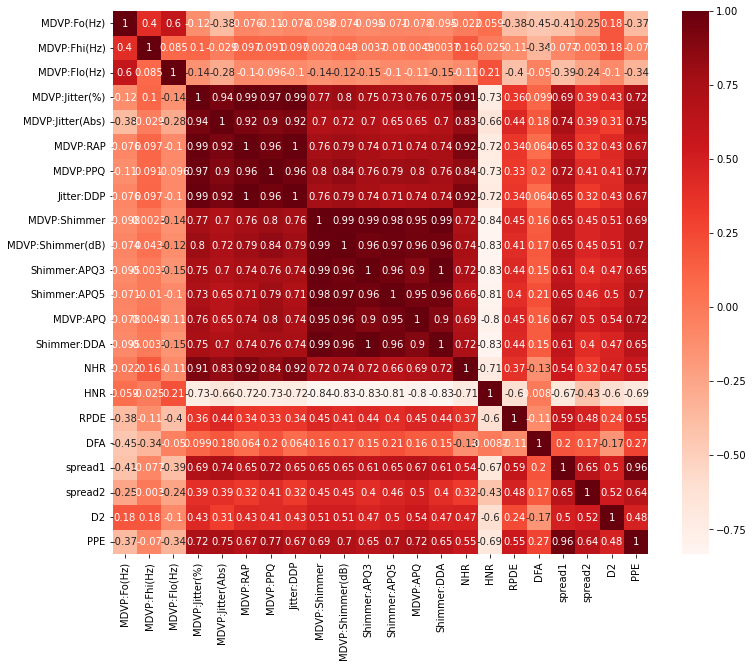

In [108]:
if __name__ == '__main__':
    df_parkinson = pd.read_csv('data/01.parkinsons.csv')
    df_parkinson.drop('name', axis = 1, inplace = True)
    # Preprocess
    df_parkinson = _preprocess(df_parkinson)
    # Visualization
    #full_visualization(df_parkinson)
    #print(df_parkinswon.describe(include = 'all'))
    #print(df_parkinson.head())
    #_check_on_CVGridSearch(df_parkinson, target_column='status')

#### Ajuste modelos sencillos:




In [5]:
#Borja :)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
def read_csv(path):
    return pd.read_csv(path)

In [7]:
def ETL(df):
    # Cuidado!
    def __map(df, columns = ['Sex','Passenger Class']):
        for column in columns:
            vals = df[column].unique()
            for i, val in enumerate(vals):
                df.loc[df[column] == val,column] = i
        df.loc[df['Survived'] == 'Yes','Survived'] = '1'
        df.loc[df['Survived'] == 'No','Survived'] = '0'
        return df
    columns_drop = ['Cabin','Life Boat','Port of Embarkation','Ticket Number']
    df = df.drop(columns_drop, axis = 1)
    print('Columns check: ',df.columns.values)
    df = df.loc[pd.notnull(df['Passenger Fare'])]
    print('Number of null rows (Passenger Fare): ',pd.isnull(df['Passenger Fare']).sum())
    mean_age = df['Age'].mean()
    df['Age'] = df['Age'].fillna(mean_age)
    print('Number of null rows (Age): ', pd.isnull(df['Age']).sum())
    df = __map(df)
    y = df['Survived'].values
    df = df.drop(['Survived','Name'], axis = 1)
    x = df.values
    return x,y

In [8]:
def titanic_optimize_parameter(X, y, method = 'knn', params = {'min_k':1,'max_k':30}):
    # Normalization
    scaler = preprocessing.StandardScaler().fit(X)
    # Weight
    num_pos = len(y[y == '1'])
    num_neg = len(y[y == '0'])
    ratio_pos =num_pos/(num_pos+num_neg)
    ratio_neg = num_neg/(num_pos+num_neg)
    # Mala practica pisar el valor
    X = scaler.transform(X)
    if method == 'knn':
        knn = KNeighborsClassifier()
        ks = dict(n_neighbors = list(range(params['min_k'],params['max_k'])))
        # Dejamos scoring por defecto - dado que los datos son desbalanceado debemos evitar el accuracy entre otras tecnicas de evaluacion sensibles a desbalanceos
        grid = GridSearchCV(knn, ks, cv=5, return_train_score=False,verbose=1, n_jobs = 4)
        grid_search=grid.fit(X,y)
        # Incorporo los resultados de CV porque se solicita un log de entrenamientos
        print(grid.cv_results_)
        # Seleccion del mejor modelo
        print(grid.best_estimator_)
        b_params = grid.best_params_
        model = KNeighborsClassifier(b_params['n_neighbors'])
    elif method == 'gbn':
        gnb = GaussianNB()
        hyper_grid = {}
        grid = GridSearchCV(gnb, hyper_grid, cv=5, return_train_score=False,verbose=1, n_jobs = 4)
        grid_search=grid.fit(X,y)
        # Seleccion del mejor modelo
        print(grid.best_estimator_)
        model = GaussianNB()
    elif method == 'logreg':
        lr = LogisticRegression()
        param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'class_weight':['balanced',{0:ratio_neg,1:ratio_pos}]}
        grid = GridSearchCV(lr, param_grid, cv=5, return_train_score=False,verbose=1, n_jobs = 4)
        grid_search=grid.fit(X,y)
        # Seleccion del mejor modelo
        print(grid.best_estimator_)
        b_params = grid.best_params_
        model = LogisticRegression(C = b_params['C'], penalty = b_params['penalty'], class_weight = b_params['class_weight'])
    elif method == 'dtree':
        tr = DecisionTreeClassifier()
        param_grid = {'max_depth':list(range(2,10)), 'criterion':['gini','entropy'],'splitter':['random','best'] ,'class_weight':['balanced',{0:ratio_neg,1:ratio_pos}]}
        grid = GridSearchCV(tr, param_grid, cv=5, return_train_score=False,verbose=1, n_jobs = 4)
        grid_search=grid.fit(X,y)
        # Seleccion del mejor modelo
        print(grid.best_estimator_)
        b_params = grid.best_params_
        print(b_params)
        model = DecisionTreeClassifier(max_depth = b_params['max_depth'], criterion = b_params['criterion'],splitter = b_params['splitter'],class_weight = b_params['class_weight'])
    # Split train-test y evaluación
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=654321)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    print(classification_report(y_test, predict))

In [9]:
if __name__ == '__main__':
    # Ej 1:
    df = read_csv('data/titanic_data.csv')
    print(df.columns.values)
    X,y = ETL(df)
    titanic_optimize_parameter(X,y)
    titanic_optimize_parameter(X,y, method = 'gbn')
    titanic_optimize_parameter(X,y, method = 'logreg')
    titanic_optimize_parameter(X,y, method = 'dtree')

['Passenger Class' 'Name' 'Sex' 'Age' 'No of Siblings or Spouses on Board'
 'No of Parents or Children on Board' 'Ticket Number' 'Passenger Fare'
 'Cabin' 'Port of Embarkation' 'Life Boat' 'Survived']
Columns check:  ['Passenger Class' 'Name' 'Sex' 'Age' 'No of Siblings or Spouses on Board'
 'No of Parents or Children on Board' 'Passenger Fare' 'Survived']
Number of null rows (Passenger Fare):  0
Number of null rows (Age):  0
Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'mean_fit_time': array([0.00259881, 0.00260019, 0.00260587, 0.00201249, 0.00239553,
       0.0021996 , 0.00300794, 0.0025949 , 0.00279994, 0.00319877,
       0.00300736, 0.00319486, 0.00238633, 0.00260973, 0.00259914,
       0.00241451, 0.00260606, 0.0024117 , 0.00261707, 0.00298944,
       0.00340242, 0.00300555, 0.00219159, 0.00198765, 0.00220799,
       0.00280771, 0.00239964, 0.00319004, 0.00320015]), 'std_fit_time': array([4.89044836e-04, 7.99656170e-04, 4.94114976e-04, 1.25996944e-05,
       4.97

C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check

LogisticRegression(C=10.0, class_weight='balanced')
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       249
           1       0.73      0.81      0.77       144

    accuracy                           0.82       393
   macro avg       0.81      0.82      0.81       393
weighted avg       0.83      0.82      0.82       393

Fitting 5 folds for each of 64 candidates, totalling 320 fits
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, splitter='random')
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       249
           1       0.84      0.74      0.79       144

    accuracy                           0.85       393
   macro avg       0.85      0.83      0.84       393
weighted avg       0.85      0.85      0.85       393



C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
TypeError: '<' not supported between instances of 'str' and 'int'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\borja\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_